<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/Statistical-Methods-for-Machine-Learning/blob/main/Neural_Network_muffins_chiuaua_greyscale_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STATISTICAL METHODS FOR MACHINE LEARNING**
Image recognition project
Student: Alessia Leo Folliero (08399A)



Import of the required library such as tensorflow, keras, matplotlib and pandas

In [ ]:
import pandas as pd
import tensorflow
import keras
import pandas
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras import layers
import keras.models
!pip install keras-tuner
import kerastuner as kt
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import Hyperband
from kerastuner import Hyperband
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import keras
from keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomFlip, RandomRotation
import os
from PIL import Image
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


<ipython-input-1-289bd2e9dc28>:22: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Importing the dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "XXXXXXXX"
os.environ['KAGGLE_KEY'] = "XXXXXXXXX"
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

 99% 467M/474M [00:04<00:00, 98.8MB/s]
100% 474M/474M [00:04<00:00, 103MB/s] 


unzip the dataset

In [ ]:
#unzip
!unzip -q /content/muffin-vs-chihuahua-image-classification.zip

Print the original Images

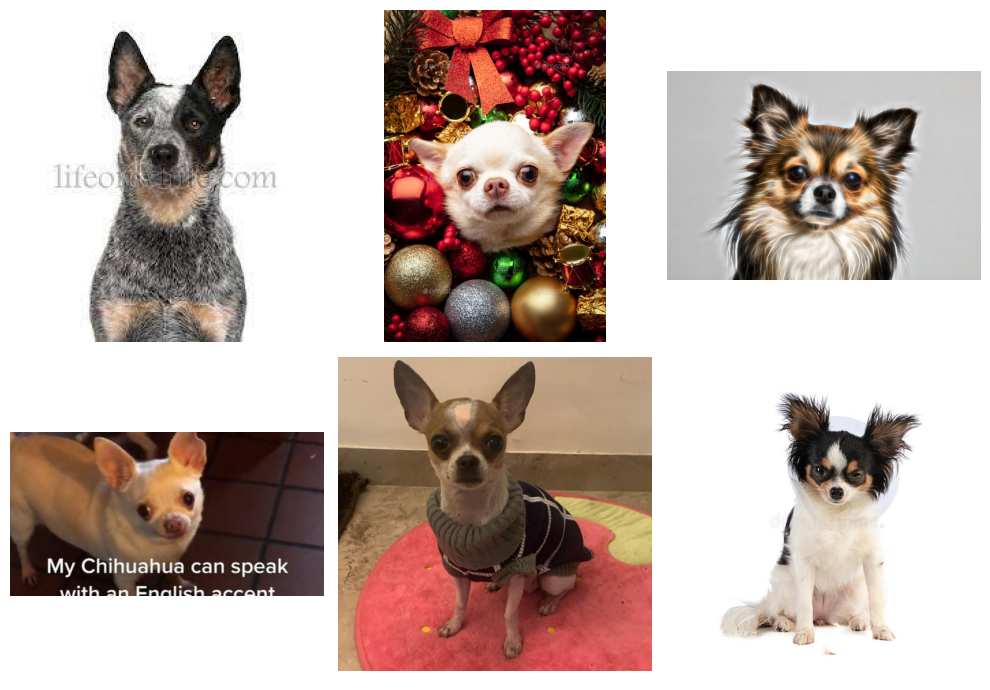

In [ ]:
folder = '/content/train/chihuahua'
count = 7

# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

Transform the jpg images into greyscale

In [ ]:
# Directory where images are
root_directory = '/content/train'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/train_grey'

# Function to convert an image to grayscale
def convert_to_grayscale(input_path, output_path):
    try:
        img = Image.open(input_path)
        img=img.convert('L') # Convert to grayscale
        img.save(output_path)
        print(f'Converted to grayscale: {output_path}')
    except Exception as e:
        print(f'Error converting {input_path} to grayscale: {e}')

# Function to convert images to grayscale in a directory and its subdirectories
def convert_images_to_grayscale_in_directory(directory, output_dir):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                convert_to_grayscale(input_path, output_path)

# Call the function
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/train_grey/chihuahua/img_1_1187.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_3_145.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_3_953.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_2_345.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_4_423.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_1_1242.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_2_616.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_2_28.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_3_131.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_1_1223.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_2_436.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_3_106.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_4_381.jpg
Converted to grayscale: /content/train_grey/chihuahua/img_0_981.jpg
Converted to grayscale: /content/train_grey/ch

Converting to greyscale also the test set

In [ ]:
# Directory where images are
root_directory = '/content/test'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/test_grey'

# Call the function
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/test_grey/chihuahua/img_2_996.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_2_832.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_1_136.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_1_197.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_2_631.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_3_68.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_0_298.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_0_848.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_3_311.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_4_31.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_1_803.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_2_928.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_1_433.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_1_168.jpg
Converted to grayscale: /content/test_grey/chihuahua/img_0_18.jp

Data exploration

In [ ]:
dir='/content/train_grey/chihuahua/img_0_0.jpg'
with Image.open(dir) as img:
     img.load()

In [ ]:
img.size

(612, 612)

In [ ]:
dir='/content/train_grey/chihuahua/img_0_101.jpg'
with Image.open(dir) as img:
     img.load()

In [ ]:
img.size

(1300, 1096)

Check if the image is in greyscale, it is if mode= 'L'

In [ ]:
img.mode

'L'

Resizing the images in order to have them all in the same shape
In this case the chosen size for the image is 100, 100

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/train_grey'

# Specify the output directory where resized images will be saved
output_directory = '/content/train_grey'

# Function to resize an image
def resize_image(input_path, output_path, size):
    try:
        img = Image.open(input_path)
        img = img.resize(size)
        img.save(output_path)
        print(f'Resized: {output_path}')
    except Exception as e:
        print(f'Error resizing {input_path}: {e}')

# Function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory, output_dir, size=(100, 100)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resize_image(input_path, output_path, size)

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(100, 100))

Resized: /content/train_grey/chihuahua/img_1_1187.jpg
Resized: /content/train_grey/chihuahua/img_3_145.jpg
Resized: /content/train_grey/chihuahua/img_3_953.jpg
Resized: /content/train_grey/chihuahua/img_2_345.jpg
Resized: /content/train_grey/chihuahua/img_4_423.jpg
Resized: /content/train_grey/chihuahua/img_1_1242.jpg
Resized: /content/train_grey/chihuahua/img_2_616.jpg
Resized: /content/train_grey/chihuahua/img_2_28.jpg
Resized: /content/train_grey/chihuahua/img_3_131.jpg
Resized: /content/train_grey/chihuahua/img_1_1223.jpg
Resized: /content/train_grey/chihuahua/img_2_436.jpg
Resized: /content/train_grey/chihuahua/img_3_106.jpg
Resized: /content/train_grey/chihuahua/img_4_381.jpg
Resized: /content/train_grey/chihuahua/img_0_981.jpg
Resized: /content/train_grey/chihuahua/img_4_470.jpg
Resized: /content/train_grey/chihuahua/img_1_612.jpg
Resized: /content/train_grey/chihuahua/img_3_312.jpg
Resized: /content/train_grey/chihuahua/img_3_282.jpg
Resized: /content/train_grey/chihuahua/img_3

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/test_grey'

# Specify the output directory where resized images will be saved
output_directory = '/content/test_grey'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(100, 100))

Resized: /content/test_grey/chihuahua/img_2_996.jpg
Resized: /content/test_grey/chihuahua/img_2_832.jpg
Resized: /content/test_grey/chihuahua/img_1_136.jpg
Resized: /content/test_grey/chihuahua/img_1_197.jpg
Resized: /content/test_grey/chihuahua/img_2_631.jpg
Resized: /content/test_grey/chihuahua/img_3_68.jpg
Resized: /content/test_grey/chihuahua/img_0_298.jpg
Resized: /content/test_grey/chihuahua/img_0_848.jpg
Resized: /content/test_grey/chihuahua/img_3_311.jpg
Resized: /content/test_grey/chihuahua/img_4_31.jpg
Resized: /content/test_grey/chihuahua/img_1_803.jpg
Resized: /content/test_grey/chihuahua/img_2_928.jpg
Resized: /content/test_grey/chihuahua/img_1_433.jpg
Resized: /content/test_grey/chihuahua/img_1_168.jpg
Resized: /content/test_grey/chihuahua/img_0_18.jpg
Resized: /content/test_grey/chihuahua/img_0_1112.jpg
Resized: /content/test_grey/chihuahua/img_0_295.jpg
Resized: /content/test_grey/chihuahua/img_3_262.jpg
Resized: /content/test_grey/chihuahua/img_2_734.jpg
Resized: /cont

In [ ]:
dir='/content/train_grey/chihuahua/img_0_0.jpg'
with Image.open(dir) as img:
     img.load()
img.size

(100, 100)

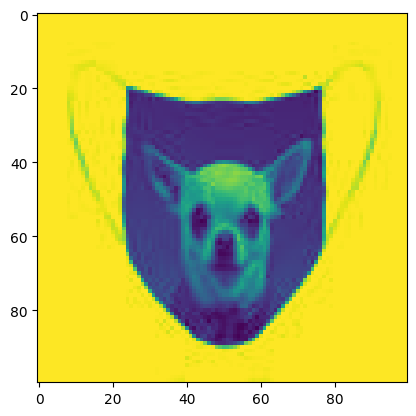

In [ ]:
dir='/content/train_grey/chihuahua/img_0_1022.jpg'
with Image.open(dir) as img:
     img.load()
img.size
plt.imshow(img)
plt.show()

Print some chiuaua images

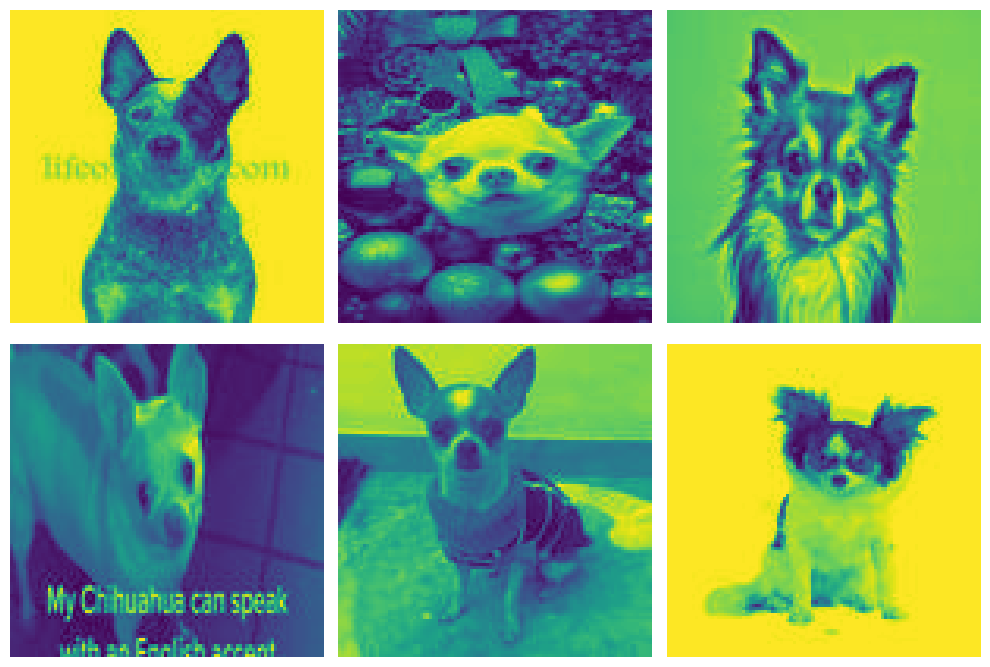

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
folder = '/content/train_grey/chihuahua'
count = 7
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

Print some muffin Images

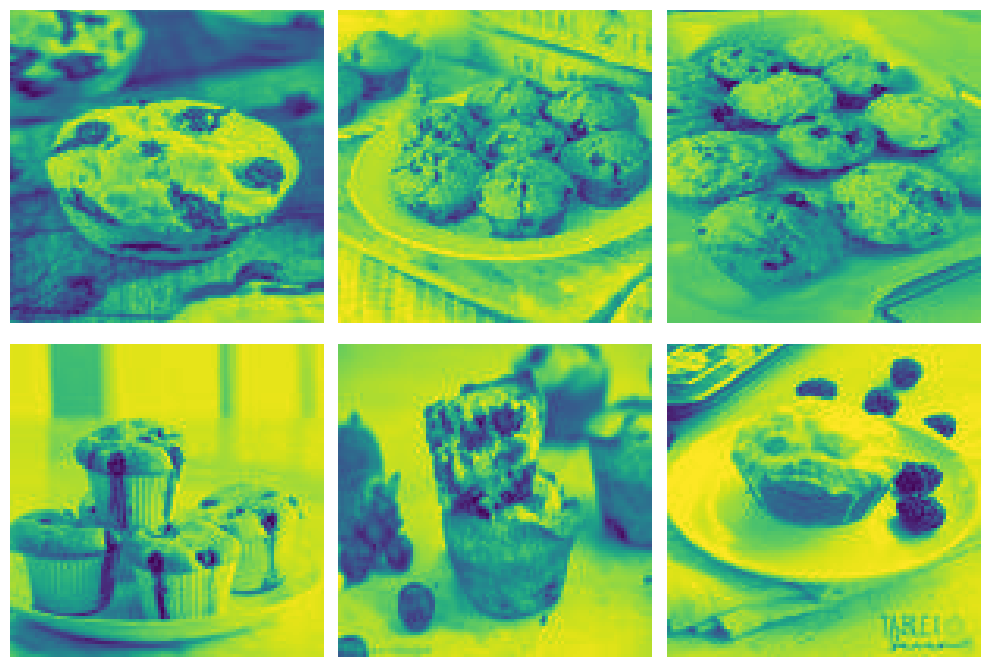

In [ ]:
folder = '/content/train_grey/muffin'
count = 7
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

# **First CNN: Baseline model to understand how a simplified model behaves**

Rescaling the pixels of the image

In order to normalize the images and split the data between train and validation I used ImageDataGenerator from keras which is a very powerful function that allows me to easily normalize, split and augment data. Thanks to this function the labels of my data are encoded by default.

The splitting of training into train and validation set is important in order to do hyperparameter tuning in a proper way.
Another key feature of ImageDataGenerator is the shuffling feature which is very important in order to prevent overfitting.

In [ ]:
# Rescaling images
tv_datagenerat = ImageDataGenerator(
    rescale=1.0 / 255,# Rescale pixel values to the range [0, 1]
    validation_split=0.2
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = tv_datagenerat.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=10,
    shuffle=True
)

Found 3788 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(train_generator.classes)

[0 0 0 ... 1 1 1]


In [ ]:
valid_generator= tv_datagenerat.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=10,
    shuffle=True
)

Found 945 images belonging to 2 classes.


In [ ]:
print(valid_generator.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(valid_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
test_generat=test_datagen.flow_from_directory(
    directory=r'/content/test_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1184 images belonging to 2 classes.


In [ ]:
print(test_generat.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(test_generat.classes)

[0 0 0 ... 1 1 1]


Show random image from train and test set

In [ ]:
import random
import matplotlib.pyplot as plt

**First Baseline model**

input_shape= (100,100,1) the one corresponds to the color encoding of the images and since in this case is greyscale it corresponds to one.

In [ ]:
model_1=Sequential(
    [Conv2D(32,(3,3),activation='relu',input_shape=(100,100,1)),
     MaxPool2D((2,2)),
     Conv2D(64,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(1,activation='sigmoid')]
)

Add the loss and backpropagation

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Training the input data

In [ ]:
mod_1=model_1.fit(train_generator,validation_data = valid_generator, epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 82s 674ms/step - loss: 0.6670 - accuracy: 0.6280 - val_loss: 0.5628 - val_accuracy: 0.7111
Epoch 2/40
119/119 [==============================] - 71s 594ms/step - loss: 0.5227 - accuracy: 0.7577 - val_loss: 0.5718 - val_accuracy: 0.7111
Epoch 3/40
119/119 [==============================] - 78s 655ms/step - loss: 0.4384 - accuracy: 0.8052 - val_loss: 0.4594 - val_accuracy: 0.7767
Epoch 4/40
119/119 [==============================] - 88s 739ms/step - loss: 0.3747 - accuracy: 0.8392 - val_loss: 0.4487 - val_accuracy: 0.8074
Epoch 5/40
119/119 [==============================] - 87s 732ms/step - loss: 0.3206 - accuracy: 0.8662 - val_loss: 0.4088 - val_accuracy: 0.8148
Epoch 6/40
119/119 [==============================] - 81s 672ms/step - loss: 0.2601 - accuracy: 0.8965 - val_loss: 0.4603 - val_accuracy: 0.7968
Epoch 7/40
119/119 [==============================] - 80s 676ms/step - loss: 0.2093 - accuracy: 0.9200 - val_loss: 0.4345 - val_ac

Plot Training VS Validation loss and Training VS Validation Accuracy

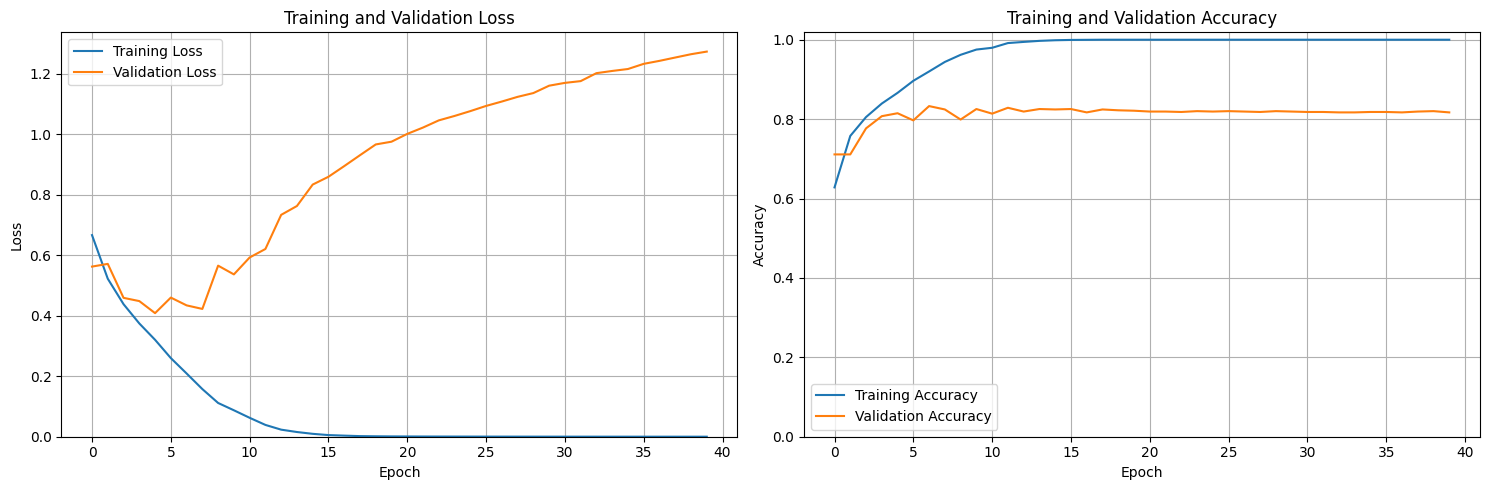

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and validation accuracy from the training history
loss = mod_1.history['loss']
val_loss = mod_1.history['val_loss']
accuracy = mod_1.history['accuracy']
val_accuracy = mod_1.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()


Model evaluation

In [ ]:
test_loss, test_acc=model_1.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 5s 122ms/step - loss: 1.2924 - accuracy: 0.8193
Test accuracy: 0.8192567825317383
Test loss: 1.2923839092254639


We can see from the previous plot that this model is not performing good with our data. We have overfitting since the training loss goes quikly to zero and the vaidation loss instead is high. Moreover from the model evaluation we see that we have that the loss is greater then the accuracy.

**Baseline Model 1.1 Adding a convolutional layer**

In [ ]:
model_1_1=Sequential(
    [Conv2D(32,(3,3),activation='relu',input_shape=(100,100,1)),
     MaxPool2D((2,2)),
     Conv2D(64,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Conv2D(128,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(1,activation='sigmoid')]
)

In [ ]:
model_1_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
mod_1_1=model_1_1.fit(train_generator,validation_data = valid_generator, epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 83s 686ms/step - loss: 0.6226 - accuracy: 0.6428 - val_loss: 0.6513 - val_accuracy: 0.7153
Epoch 2/40
119/119 [==============================] - 82s 691ms/step - loss: 0.4817 - accuracy: 0.7756 - val_loss: 0.6422 - val_accuracy: 0.6571
Epoch 3/40
119/119 [==============================] - 87s 729ms/step - loss: 0.4449 - accuracy: 0.7938 - val_loss: 0.3939 - val_accuracy: 0.8349
Epoch 4/40
119/119 [==============================] - 102s 859ms/step - loss: 0.3747 - accuracy: 0.8374 - val_loss: 0.3581 - val_accuracy: 0.8317
Epoch 5/40
119/119 [==============================] - 73s 608ms/step - loss: 0.3167 - accuracy: 0.8617 - val_loss: 0.3935 - val_accuracy: 0.8519
Epoch 6/40
119/119 [==============================] - 72s 610ms/step - loss: 0.2939 - accuracy: 0.8738 - val_loss: 0.3591 - val_accuracy: 0.8614
Epoch 7/40
119/119 [==============================] - 82s 687ms/step - loss: 0.2393 - accuracy: 0.9029 - val_loss: 0.3333 - val_a

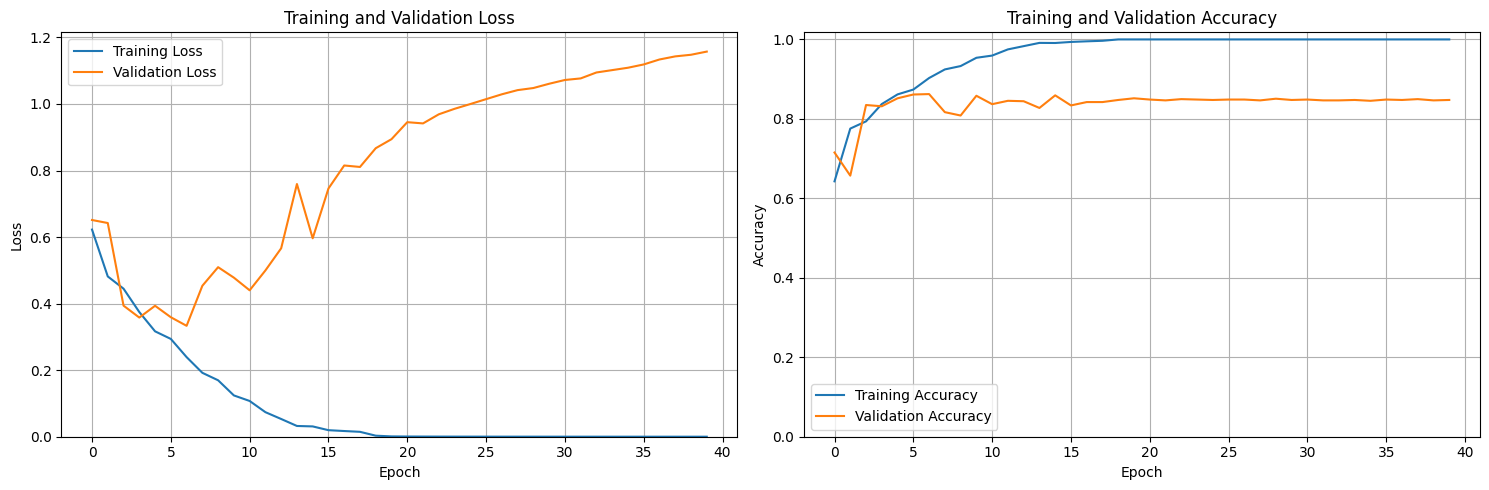

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and validation accuracy from the training history
loss = mod_1_1.history['loss']
val_loss = mod_1_1.history['val_loss']
accuracy = mod_1_1.history['accuracy']
val_accuracy = mod_1_1.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()


Model evaluation

In [ ]:
test_loss, test_acc=model_1_1.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 5s 146ms/step - loss: 1.3023 - accuracy: 0.8454
Test accuracy: 0.8454391956329346
Test loss: 1.3022838830947876


No improvements

**Model 1_2 Adding strides in the MaxPool2D and padding equal same**


In [ ]:
model_1_2=Sequential(
    [Conv2D(32,(3,3),activation='relu',input_shape=(100,100,1), padding='same'),
     MaxPool2D((2,2),strides=(2,2)),
     Conv2D(64,(3,3),activation='relu', padding='same'),
     MaxPool2D((2,2)),
     Conv2D(128,(3,3),activation='relu',padding='same'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(1,activation='sigmoid')]
)

In [ ]:
model_1_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
mod_1_2=model_1_2.fit(train_generator,validation_data = valid_generator, epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 88s 734ms/step - loss: 0.6407 - accuracy: 0.6204 - val_loss: 0.6980 - val_accuracy: 0.6878
Epoch 2/40
119/119 [==============================] - 89s 752ms/step - loss: 0.4975 - accuracy: 0.7653 - val_loss: 0.4612 - val_accuracy: 0.7841
Epoch 3/40
119/119 [==============================] - 88s 738ms/step - loss: 0.4095 - accuracy: 0.8205 - val_loss: 0.4216 - val_accuracy: 0.8328
Epoch 4/40
119/119 [==============================] - 91s 764ms/step - loss: 0.3326 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.8138
Epoch 5/40
119/119 [==============================] - 92s 778ms/step - loss: 0.3052 - accuracy: 0.8717 - val_loss: 0.3595 - val_accuracy: 0.8466
Epoch 6/40
119/119 [==============================] - 89s 752ms/step - loss: 0.2494 - accuracy: 0.8994 - val_loss: 0.3698 - val_accuracy: 0.8455
Epoch 7/40
119/119 [==============================] - 86s 726ms/step - loss: 0.1951 - accuracy: 0.9208 - val_loss: 0.3470 - val_ac

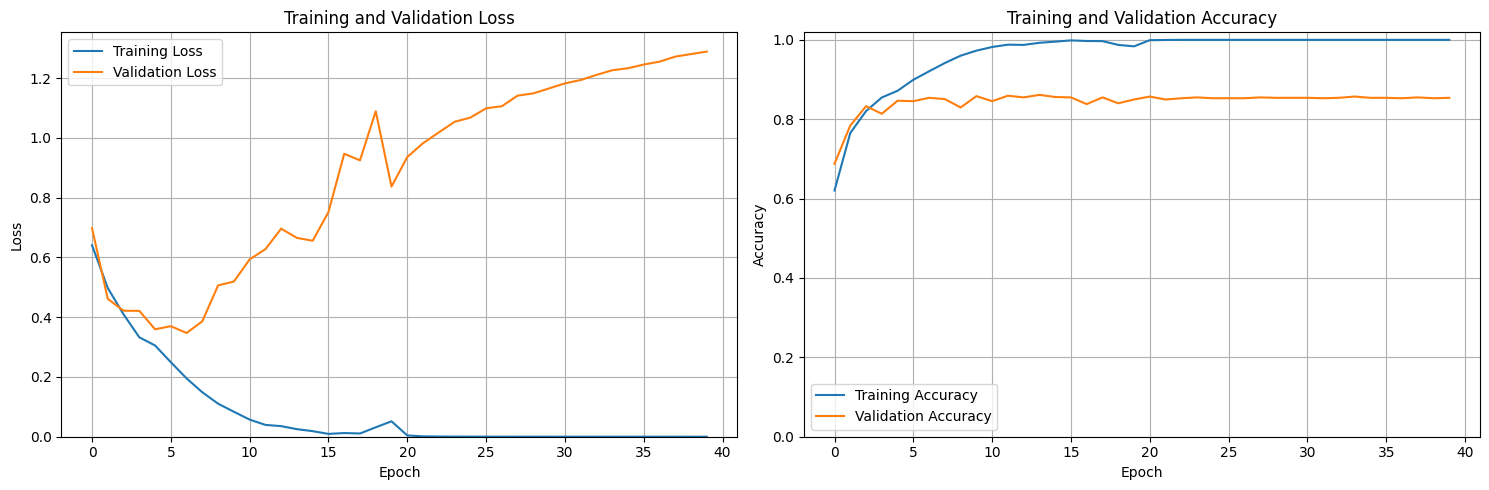

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and validation accuracy from the training history
loss = mod_1_2.history['loss']
val_loss = mod_1_2.history['val_loss']
accuracy = mod_1_2.history['accuracy']
val_accuracy = mod_1_2.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc=model_1_2.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 7s 194ms/step - loss: 1.2433 - accuracy: 0.8522
Test accuracy: 0.8521959185600281
Test loss: 1.2432606220245361


**Secon Model With droput layer and different construction of a CNN**

**Simplest Second Model**

In [ ]:
#defining model
def My_Second_Cnn():
  model_2=Sequential()

  #adding convolution layer
  model_2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_2.add(MaxPool2D(pool_size=(2,2)))
  #Dropoutlayer
  model_2.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2.add(MaxPool2D(pool_size=(2,2)))
  model_2.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2.add(MaxPool2D(pool_size=(2,2)))
  model_2.add(Dropout(0.05))

  #adding fully connected layer
  model_2.add(Flatten())
  model_2.add(Dense(128,activation='relu'))
  model_2.add(Dropout(0.05))

  #adding output layer
  model_2.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2

In [ ]:
Second_model=My_Second_Cnn()

In [ ]:
mod_two=Second_model.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 70s 580ms/step - loss: 0.6334 - accuracy: 0.6262 - val_loss: 0.6254 - val_accuracy: 0.6825
Epoch 2/40
119/119 [==============================] - 74s 622ms/step - loss: 0.5064 - accuracy: 0.7582 - val_loss: 0.5966 - val_accuracy: 0.6984
Epoch 3/40
119/119 [==============================] - 74s 622ms/step - loss: 0.4487 - accuracy: 0.8012 - val_loss: 0.4229 - val_accuracy: 0.8169
Epoch 4/40
119/119 [==============================] - 70s 592ms/step - loss: 0.3653 - accuracy: 0.8395 - val_loss: 0.3780 - val_accuracy: 0.8116
Epoch 5/40
119/119 [==============================] - 70s 590ms/step - loss: 0.3051 - accuracy: 0.8699 - val_loss: 0.3674 - val_accuracy: 0.8360
Epoch 6/40
119/119 [==============================] - 71s 598ms/step - loss: 0.2531 - accuracy: 0.8944 - val_loss: 0.3502 - val_accuracy: 0.8455
Epoch 7/40
119/119 [==============================] - 69s 580ms/step - loss: 0.1962 - accuracy: 0.9197 - val_loss: 0.4383 - val_ac

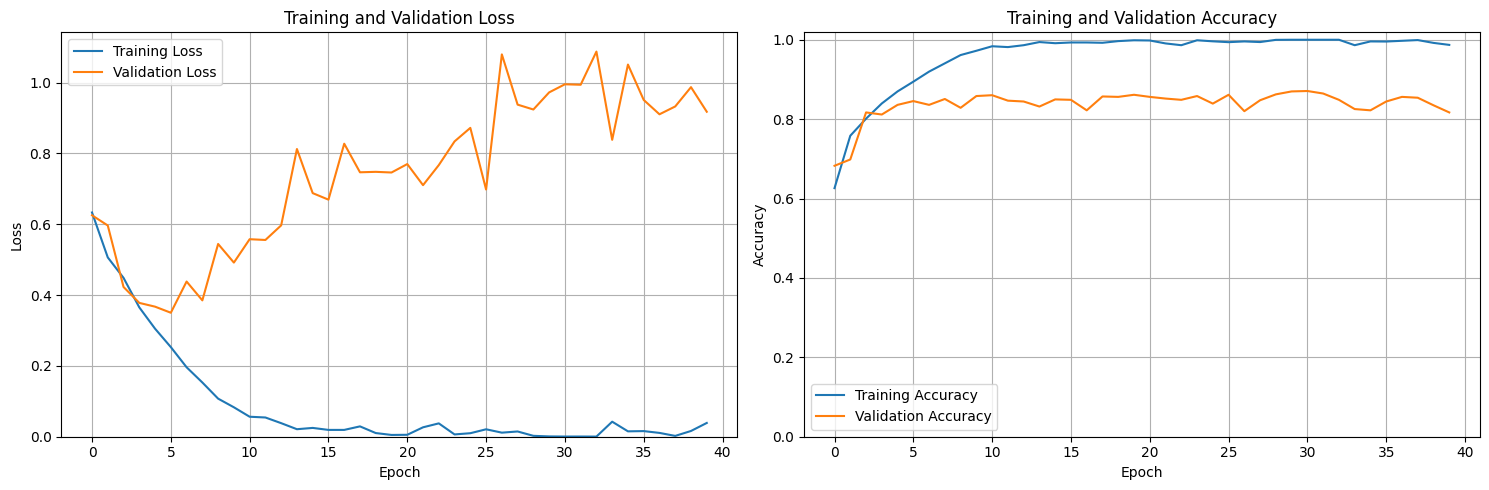

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two.history['loss']
val_loss = mod_two.history['val_loss']
accuracy = mod_two.history['accuracy']
val_accuracy = mod_two.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 5s 128ms/step - loss: 0.9152 - accuracy: 0.8285
Test accuracy: 0.8285472989082336
Test loss: 0.915231466293335


With this second model we have a slight improvement with respect to the first model but we still have overfitting and the architecture is not performing well with our data.

Variation of the second model adding strides to the first convolutional network


In [ ]:
#defining model
def My_Second_Cnn_1():
  model_2_1=Sequential()

  #adding convolution layer
  model_2_1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_2_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_1.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2_1.add(MaxPool2D(pool_size=(2,2)))
  model_2_1.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2_1.add(MaxPool2D(pool_size=(2,2)))
  model_2_1.add(Dropout(0.05))

  #adding fully connected layer
  model_2_1.add(Flatten())
  model_2_1.add(Dense(128,activation='relu'))
  model_2_1.add(Dropout(0.05))

  #adding output layer
  model_2_1.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_1

In [ ]:
Second_model_1=My_Second_Cnn_1()

In [ ]:
mod_two_1=Second_model_1.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

Plot

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_1.history['loss']
val_loss = mod_two_1.history['val_loss']
accuracy = mod_two_1.history['accuracy']
val_accuracy = mod_two_1.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_1.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

Improvement of the second Model with Batchnormalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#defining model
def My_Second_Cnn_2():
  model_2_2=Sequential()

  #adding convolution layer
  model_2_2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_2_2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_2.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2_2.add(MaxPool2D(pool_size=(2,2)))
  model_2_2.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2_2.add(BatchNormalization())
  model_2_2.add(MaxPool2D(pool_size=(2,2)))
  model_2_2.add(Dropout(0.05))

  #adding fully connected layer
  model_2_2.add(Flatten())
  model_2_2.add(Dense(128,activation='relu'))
  model_2_2.add(Dropout(0.05))

  #adding output layer
  model_2_2.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_2

In [ ]:
Second_model_2=My_Second_Cnn_2()

In [ ]:
mod_two_2=Second_model_2.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 72s 594ms/step - loss: 0.6269 - accuracy: 0.7199 - val_loss: 0.6535 - val_accuracy: 0.8212
Epoch 2/40
119/119 [==============================] - 71s 593ms/step - loss: 0.4134 - accuracy: 0.8221 - val_loss: 0.6140 - val_accuracy: 0.7746
Epoch 3/40
119/119 [==============================] - 75s 629ms/step - loss: 0.3716 - accuracy: 0.8403 - val_loss: 0.5311 - val_accuracy: 0.7397
Epoch 4/40
119/119 [==============================] - 70s 587ms/step - loss: 0.3067 - accuracy: 0.8664 - val_loss: 0.3967 - val_accuracy: 0.8466
Epoch 5/40
119/119 [==============================] - 70s 585ms/step - loss: 0.2426 - accuracy: 0.9023 - val_loss: 0.4905 - val_accuracy: 0.7873
Epoch 6/40
119/119 [==============================] - 74s 623ms/step - loss: 0.1788 - accuracy: 0.9290 - val_loss: 1.0034 - val_accuracy: 0.6984
Epoch 7/40
119/119 [==============================] - 73s 613ms/step - loss: 0.1216 - accuracy: 0.9520 - val_loss: 0.9387 - val_ac

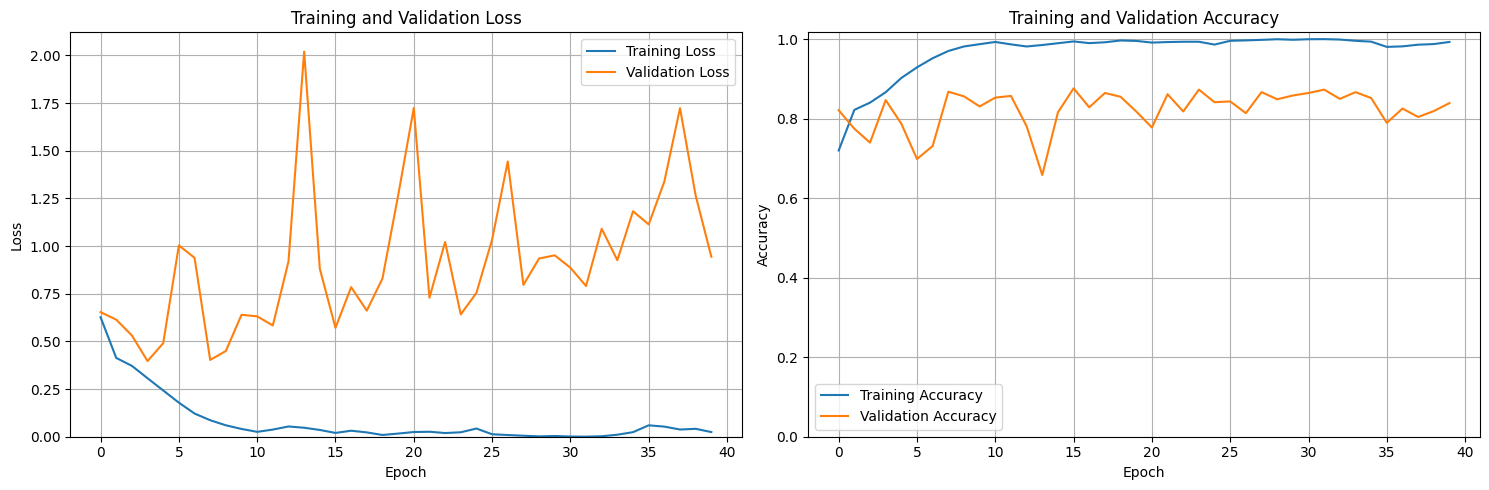

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_2.history['loss']
val_loss = mod_two_2.history['val_loss']
accuracy = mod_two_2.history['accuracy']
val_accuracy = mod_two_2.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_2.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 7s 176ms/step - loss: 1.0077 - accuracy: 0.8328
Test accuracy: 0.8327702879905701
Test loss: 1.0077015161514282


Worse result with bathcnormalization

**Data augmentation for the second Model**

Thanks to ImageDataGenerator we are also able to add data augmentation to our train and validation set which is very important in order to avoid overfitting.

In [ ]:
# Rescaling images
tv_datagenerat_n = ImageDataGenerator(
    rescale=1.0 / 255,# Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2
)
test_datagen_n=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator_n = tv_datagenerat_n.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=10,
    shuffle=True
)

Found 3788 images belonging to 2 classes.


In [ ]:
valid_generator_n= tv_datagenerat_n.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=10,
    shuffle=True
)

Found 945 images belonging to 2 classes.


In [ ]:
test_generat_n=test_datagen_n.flow_from_directory(
    directory=r'/content/test_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1184 images belonging to 2 classes.


In [ ]:
#defining model
def My_Second_Cnn_3():
  model_2_3=Sequential()

  #adding convolution layer
  model_2_3.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_2_3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_3.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2_3.add(MaxPool2D(pool_size=(2,2)))
  model_2_3.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2_3.add(BatchNormalization())
  model_2_3.add(MaxPool2D(pool_size=(2,2)))
  model_2_3.add(Dropout(0.05))

  #adding fully connected layer
  model_2_3.add(Flatten())
  model_2_3.add(Dense(128,activation='relu'))
  model_2_3.add(Dropout(0.05))

  #adding output layer
  model_2_3.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_3

In [ ]:
Second_model_3=My_Second_Cnn_3()

In [ ]:
mod_two_3=Second_model_3.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 92s 768ms/step - loss: 0.4959 - accuracy: 0.7716 - val_loss: 0.6601 - val_accuracy: 0.7101
Epoch 2/40
119/119 [==============================] - 73s 617ms/step - loss: 0.4571 - accuracy: 0.7872 - val_loss: 0.5801 - val_accuracy: 0.8000
Epoch 3/40
119/119 [==============================] - 74s 620ms/step - loss: 0.3967 - accuracy: 0.8305 - val_loss: 0.5063 - val_accuracy: 0.8381
Epoch 4/40
119/119 [==============================] - 74s 619ms/step - loss: 0.3606 - accuracy: 0.8419 - val_loss: 0.5130 - val_accuracy: 0.7090
Epoch 5/40
119/119 [==============================] - 74s 619ms/step - loss: 0.3035 - accuracy: 0.8725 - val_loss: 0.3369 - val_accuracy: 0.8455
Epoch 6/40
119/119 [==============================] - 73s 614ms/step - loss: 0.2726 - accuracy: 0.8915 - val_loss: 0.6396 - val_accuracy: 0.7450
Epoch 7/40
119/119 [==============================] - 75s 632ms/step - loss: 0.2494 - accuracy: 0.8994 - val_loss: 0.3488 - val_ac

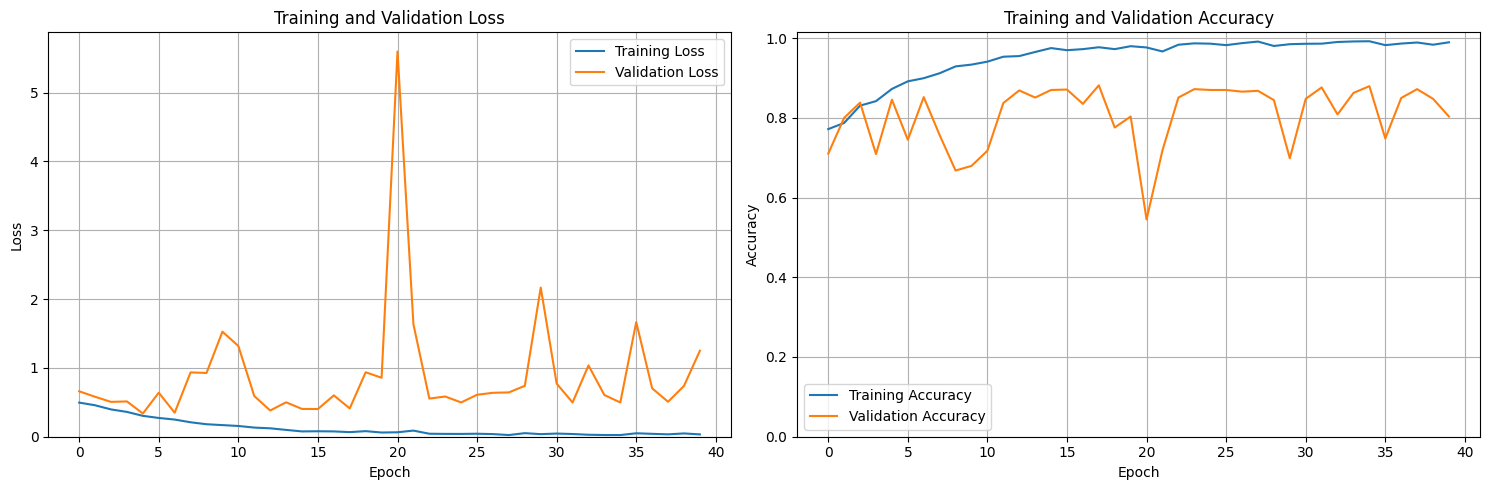

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_3.history['loss']
val_loss = mod_two_3.history['val_loss']
accuracy = mod_two_3.history['accuracy']
val_accuracy = mod_two_3.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_3.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 5s 138ms/step - loss: 0.8796 - accuracy: 0.8446
Test accuracy: 0.8445945978164673
Test loss: 0.8795536160469055


Another variation of the second model with augmentation and padding equal same and without Batchnormalization (which seems to worsen the result and not help the model to generalize better)

In [ ]:
#defining model
def My_Second_Cnn_4():
  model_2_4=Sequential()

  #adding convolution layer
  model_2_4.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_4.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_4.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_4.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_4.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_4.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_4.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_4.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_4.add(Dropout(0.05))

  #adding fully connected layer
  model_2_4.add(Flatten())
  model_2_4.add(Dense(128,activation='relu'))
  model_2_4.add(Dropout(0.05))

  #adding output layer
  model_2_4.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_4

In [ ]:
Second_model_4=My_Second_Cnn_4()

In [ ]:
mod_two_4=Second_model_4.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 106s 743ms/step - loss: 0.6378 - accuracy: 0.6336 - val_loss: 0.5660 - val_accuracy: 0.7534
Epoch 2/40
119/119 [==============================] - 86s 722ms/step - loss: 0.4978 - accuracy: 0.7724 - val_loss: 0.4872 - val_accuracy: 0.7894
Epoch 3/40
119/119 [==============================] - 89s 748ms/step - loss: 0.4444 - accuracy: 0.8060 - val_loss: 0.3867 - val_accuracy: 0.8392
Epoch 4/40
119/119 [==============================] - 89s 747ms/step - loss: 0.3967 - accuracy: 0.8223 - val_loss: 0.3650 - val_accuracy: 0.8423
Epoch 5/40
119/119 [==============================] - 87s 723ms/step - loss: 0.3656 - accuracy: 0.8413 - val_loss: 0.3299 - val_accuracy: 0.8561
Epoch 6/40
119/119 [==============================] - 91s 762ms/step - loss: 0.3315 - accuracy: 0.8606 - val_loss: 0.3232 - val_accuracy: 0.8614
Epoch 7/40
119/119 [==============================] - 91s 763ms/step - loss: 0.3090 - accuracy: 0.8672 - val_loss: 0.2956 - val_a

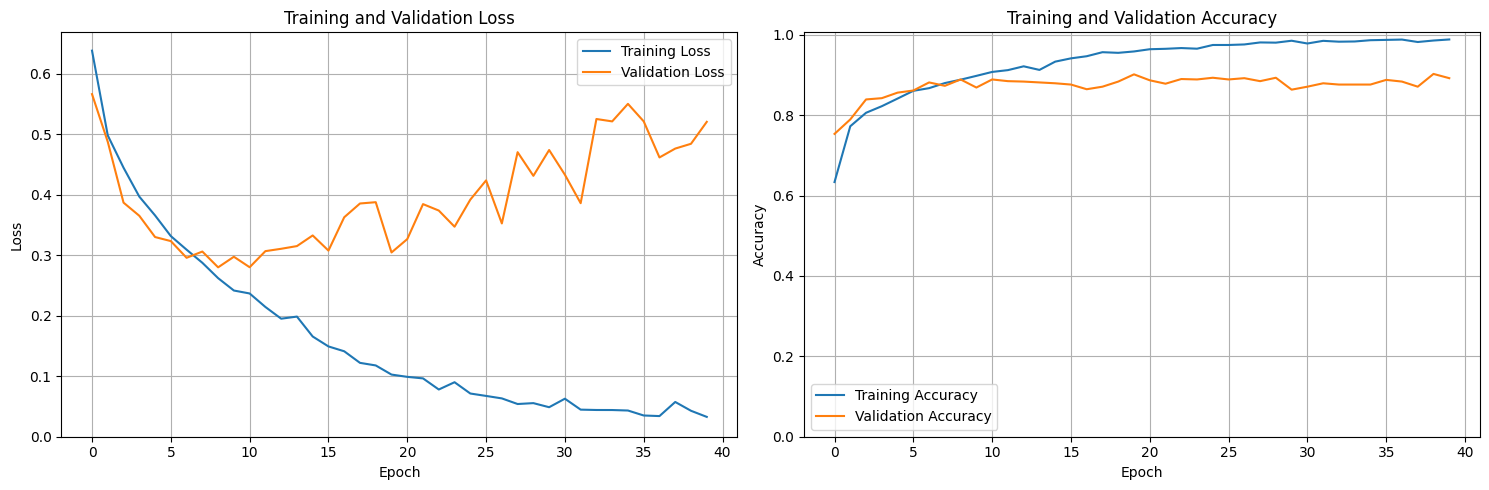

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_4.history['loss']
val_loss = mod_two_4.history['val_loss']
accuracy = mod_two_4.history['accuracy']
val_accuracy = mod_two_4.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_4.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 8s 206ms/step - loss: 0.4877 - accuracy: 0.8775
Test accuracy: 0.8775337934494019
Test loss: 0.4876629710197449


We obtain slight better result but we still have overfitting.

**Hyperparameter tuning with the model that had the best result so far.**

In this model we tuned the convolutional filter, the units in the fully connected layer and the dropout rate and I have done hyperparameter tuning thanks to keras_tuner using RandomSearch.

In [ ]:
#defining model
def My_Second_Cnn_5(param):
  model_2_5=Sequential()

  #adding convolution layer
  model_2_5.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_5.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))


  ###Second Convolutional Layer
  model_2_5.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_5.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))

  ###Third Convolutional Layer
  model_2_5.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_5.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model_2_5.add(Flatten())
  model_2_5.add(Dense(units=param.Int('units', min_value=32, max_value=128, step=16),activation='relu'))
  model_2_5.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model_2_5.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_5

In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_5,
  objective='val_accuracy',
  max_trials=3,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 3 Complete [01h 17m 31s]
val_accuracy: 0.859611988067627

Best val_accuracy So Far: 0.859611988067627
Total elapsed time: 04h 07m 20s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 96,
 'drop_1': 0.1,
 'conv2_filter': 80,
 'conv3_filter': 96,
 'units': 128}

In [ ]:
model_best_2= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40=model_best_2.fit(train_generator_n,validation_data = valid_generator_n, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

In [ ]:
mt40=model_best_2.evaluate(test_generat_n)

I used the tuned parameter in the following model

In [ ]:
#defining model
def My_Second_Cnn_5():
  model_2_5=Sequential()

  #adding convolution layer
  model_2_5.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_5.add(Dropout(0.1))


  ###Second Convolutional Layer
  model_2_5.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_5.add(Dropout(0.1))

  ###Third Convolutional Layer
  model_2_5.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_5.add(Dropout(0.1))

  #adding fully connected layer
  model_2_5.add(Flatten())
  model_2_5.add(Dense(128,activation='relu'))
  model_2_5.add(Dropout(0.1))

  #adding output layer
  model_2_5.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_5

In [ ]:
Second_model_5=My_Second_Cnn_5()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mod_two_5=Second_model_5.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,callbacks=[early_stop], verbose=1,batch_size=32)

Epoch 1/40
119/119 [==============================] - 139s 1s/step - loss: 0.6944 - accuracy: 0.5322 - val_loss: 0.6857 - val_accuracy: 0.5407
Epoch 2/40
119/119 [==============================] - 117s 987ms/step - loss: 0.6872 - accuracy: 0.5378 - val_loss: 0.6772 - val_accuracy: 0.5407
Epoch 3/40
119/119 [==============================] - 120s 1s/step - loss: 0.6723 - accuracy: 0.5673 - val_loss: 0.6282 - val_accuracy: 0.6497
Epoch 4/40
119/119 [==============================] - 116s 978ms/step - loss: 0.5438 - accuracy: 0.7344 - val_loss: 0.5020 - val_accuracy: 0.7810
Epoch 5/40
119/119 [==============================] - 115s 966ms/step - loss: 0.4915 - accuracy: 0.7703 - val_loss: 0.4634 - val_accuracy: 0.7831
Epoch 6/40
119/119 [==============================] - 122s 1s/step - loss: 0.4358 - accuracy: 0.8023 - val_loss: 0.4672 - val_accuracy: 0.7884
Epoch 7/40
119/119 [==============================] - 117s 982ms/step - loss: 0.4028 - accuracy: 0.8218 - val_loss: 0.4007 - val_accu

In [ ]:
test_loss,test_acc=Second_model_5.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 10s 261ms/step - loss: 0.6788 - accuracy: 0.8522
Test accuracy: 0.8521959185600281
Test loss: 0.6788263320922852


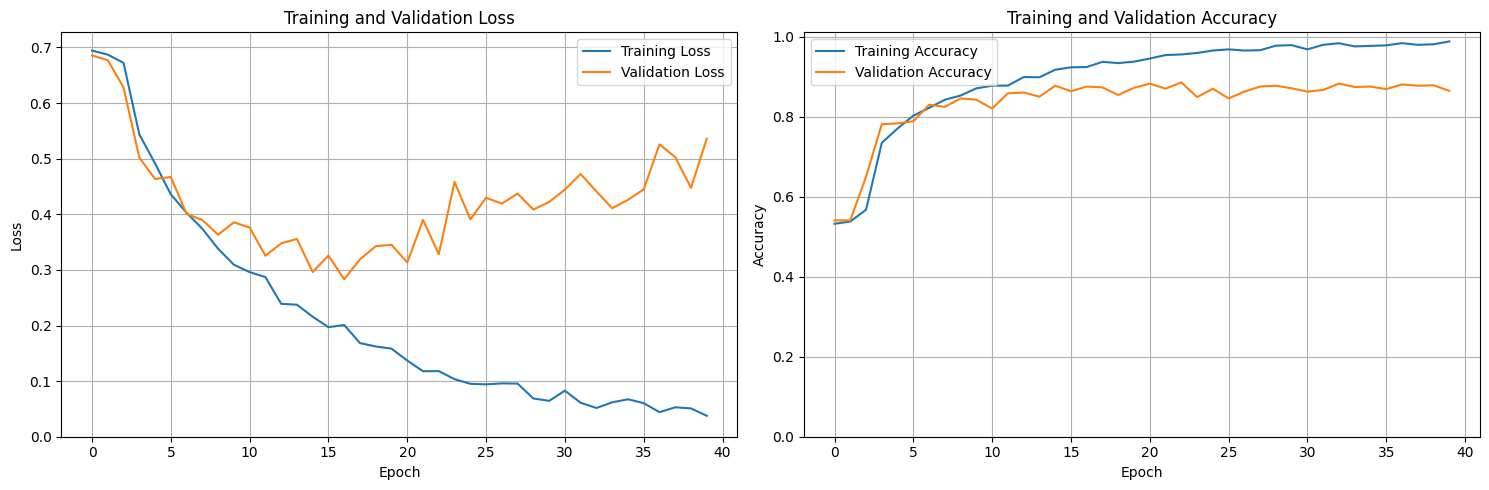

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_5.history['loss']
val_loss = mod_two_5.history['val_loss']
accuracy = mod_two_5.history['accuracy']
val_accuracy = mod_two_5.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Hyperparameter tuning for all the drop

In [ ]:
#defining model
def My_Second_Cnn_6(param):
  model_2_6=Sequential()

  #adding convolution layer
  model_2_6.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_6.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_6.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.5, step=0.05)))


  ###Second Convolutional Layer
  model_2_6.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_6.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_6.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.5, step=0.05)))

  ###Third Convolutional Layer
  model_2_6.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_6.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_6.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model_2_6.add(Flatten())
  model_2_6.add(Dense(128,activation='relu'))
  model_2_6.add(Dropout(param.Float('drop_4', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model_2_6.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_6

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_6,
  objective='val_accuracy',
  max_trials=3,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 3 Complete [00h 51m 55s]
val_accuracy: 0.8472663362820944

Best val_accuracy So Far: 0.8631393313407898
Total elapsed time: 02h 35m 13s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'drop_1': 0.2, 'drop_2': 0.2, 'drop_3': 0.15000000000000002, 'drop_4': 0.2}

In [ ]:
model_best_2= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_6=model_best_2.fit(train_generator_n,validation_data = valid_generator_n, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/40
119/119 [==============================] - 117s 975ms/step - loss: 0.6700 - accuracy: 0.5879 - val_loss: 0.6183 - val_accuracy: 0.6899
Epoch 2/40
119/119 [==============================] - 124s 1s/step - loss: 0.5435 - accuracy: 0.7373 - val_loss: 0.5198 - val_accuracy: 0.7534
Epoch 3/40
119/119 [==============================] - 115s 971ms/step - loss: 0.4869 - accuracy: 0.7727 - val_loss: 0.4884 - val_accuracy: 0.7767
Epoch 4/40
119/119 [==============================] - 115s 970ms/step - loss: 0.4438 - accuracy: 0.7954 - val_loss: 0.4087 - val_accuracy: 0.8265
Epoch 5/40
119/119 [==============================] - 118s 990ms/step - loss: 0.4046 - accuracy: 0.8247 - val_loss: 0.3421 - val_accuracy: 0.8582
Epoch 6/40
119/119 [==============================] - 117s 985ms/step - loss: 0.3765 - accuracy: 0.8361 - val_loss: 0.3769 - val_accuracy: 0.8360
Epoch 7/40
119/119 [==============================] - 115s 971ms/step - loss: 0.3489 - accuracy: 0.8416 - val_loss: 0.3276 - va

In [ ]:
mt40=model_best_2.evaluate(test_generat_n)

37/37 [==============================] - 9s 239ms/step - loss: 0.4194 - accuracy: 0.8851


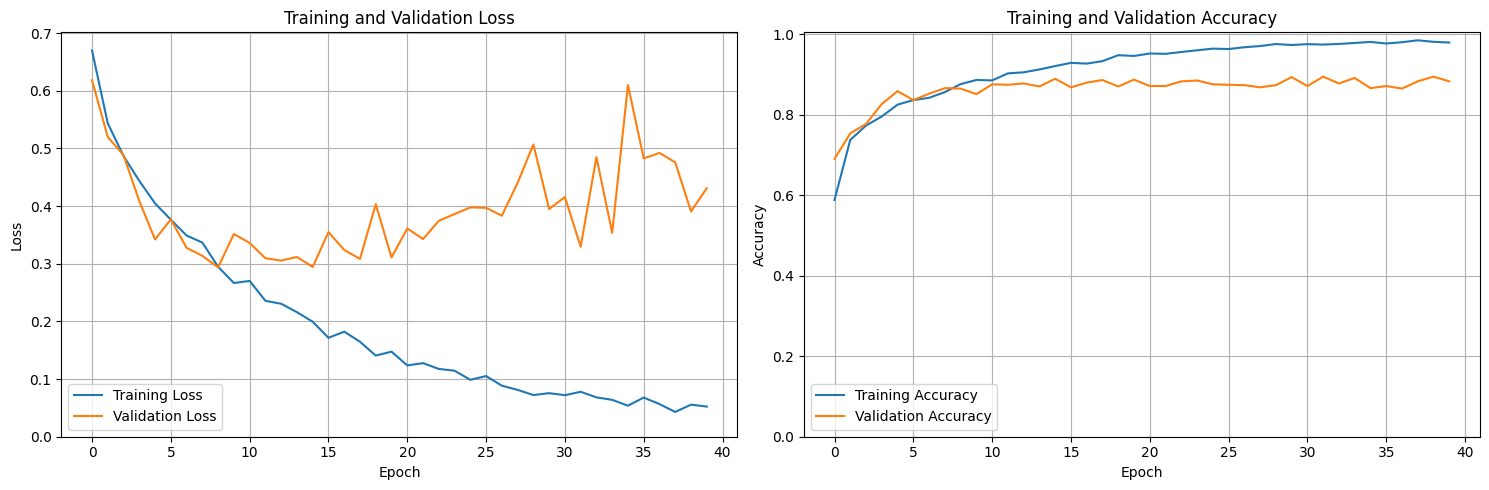

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_6.history['loss']
val_loss = mm_40_6.history['val_loss']
accuracy = mm_40_6.history['accuracy']
val_accuracy = mm_40_6.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Same model with tuning of the learning rate

In [ ]:
#defining model
def My_Second_Cnn_7(param):
  model_2_7=Sequential()

  #adding convolution layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_7.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_7.add(Dropout(0.2))


  ###Second Convolutional Layer
  model_2_7.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_7.add(Dropout(0.2))

  ###Third Convolutional Layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_7.add(Dropout(0.15))

  #adding fully connected layer
  model_2_7.add(Flatten())
  model_2_7.add(Dense(128,activation='relu'))
  model_2_7.add(Dropout(0.2))

  #adding output layer
  model_2_7.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_7.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= param.Float('learning_rate',min_value=1e-6, max_value=1e-2, sampling='log')),metrics=['accuracy'])

  return model_2_7

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_7,
  objective='val_accuracy',
  max_trials=5,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 5 Complete [01h 17m 11s]
val_accuracy: 0.5414462089538574

Best val_accuracy So Far: 0.7728394865989685
Total elapsed time: 06h 27m 49s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'learning_rate': 5.2467708973067236e-05}

In [ ]:
model_best_2_7= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_7=model_best_2_7.fit(train_generator_n,validation_data = valid_generator_n, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/40
119/119 [==============================] - 194s 2s/step - loss: 0.6900 - accuracy: 0.5428 - val_loss: 0.6851 - val_accuracy: 0.5407
Epoch 2/40
119/119 [==============================] - 193s 2s/step - loss: 0.6798 - accuracy: 0.5676 - val_loss: 0.6711 - val_accuracy: 0.6963
Epoch 3/40
119/119 [==============================] - 191s 2s/step - loss: 0.6255 - accuracy: 0.6558 - val_loss: 0.5935 - val_accuracy: 0.7005
Epoch 4/40
  2/119 [..............................] - ETA: 2:31 - loss: 0.6097 - accuracy: 0.6719

In [ ]:
mt40=model_best_2_7.evaluate(test_generat_n)

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_7.history['loss']
val_loss = mm_40_7.history['val_loss']
accuracy = mm_40_7.history['accuracy']
val_accuracy = mm_40_7.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Round 5.2467708973067236e-05 to 0.00005

In [ ]:
#defining model
def My_Second_Cnn_7():
  model_2_7=Sequential()

  #adding convolution layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_7.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_7.add(Dropout(0.2))


  ###Second Convolutional Layer
  model_2_7.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_7.add(Dropout(0.2))

  ###Third Convolutional Layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_7.add(Dropout(0.15))

  #adding fully connected layer
  model_2_7.add(Flatten())
  model_2_7.add(Dense(128,activation='relu'))
  model_2_7.add(Dropout(0.2))

  #adding output layer
  model_2_7.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_7.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.00005),metrics=['accuracy'])

  return model_2_7

In [ ]:
Second_model_7=My_Second_Cnn_7()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5,start_from_epoch=20)
mod_two_7=Second_model_7.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,callbacks=[early_stop], verbose=1,batch_size=32)

Epoch 1/40
119/119 [==============================] - 225s 2s/step - loss: 0.6892 - accuracy: 0.5409 - val_loss: 0.6854 - val_accuracy: 0.5386
Epoch 2/40
119/119 [==============================] - 222s 2s/step - loss: 0.6765 - accuracy: 0.5755 - val_loss: 0.6714 - val_accuracy: 0.6434
Epoch 3/40
119/119 [==============================] - 231s 2s/step - loss: 0.6144 - accuracy: 0.6595 - val_loss: 0.5906 - val_accuracy: 0.7079
Epoch 4/40
119/119 [==============================] - 214s 2s/step - loss: 0.5546 - accuracy: 0.7289 - val_loss: 0.5544 - val_accuracy: 0.7513
Epoch 5/40
119/119 [==============================] - 223s 2s/step - loss: 0.5232 - accuracy: 0.7555 - val_loss: 0.5470 - val_accuracy: 0.7524
Epoch 6/40
119/119 [==============================] - 224s 2s/step - loss: 0.4888 - accuracy: 0.7833 - val_loss: 0.5194 - val_accuracy: 0.7587
Epoch 7/40
119/119 [==============================] - 221s 2s/step - loss: 0.4727 - accuracy: 0.7891 - val_loss: 0.5348 - val_accuracy: 0.7481

In [ ]:
test_loss,test_acc=Second_model_7.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 16s 423ms/step - loss: 0.4872 - accuracy: 0.7720
Test accuracy: 0.7719594836235046
Test loss: 0.48719853162765503


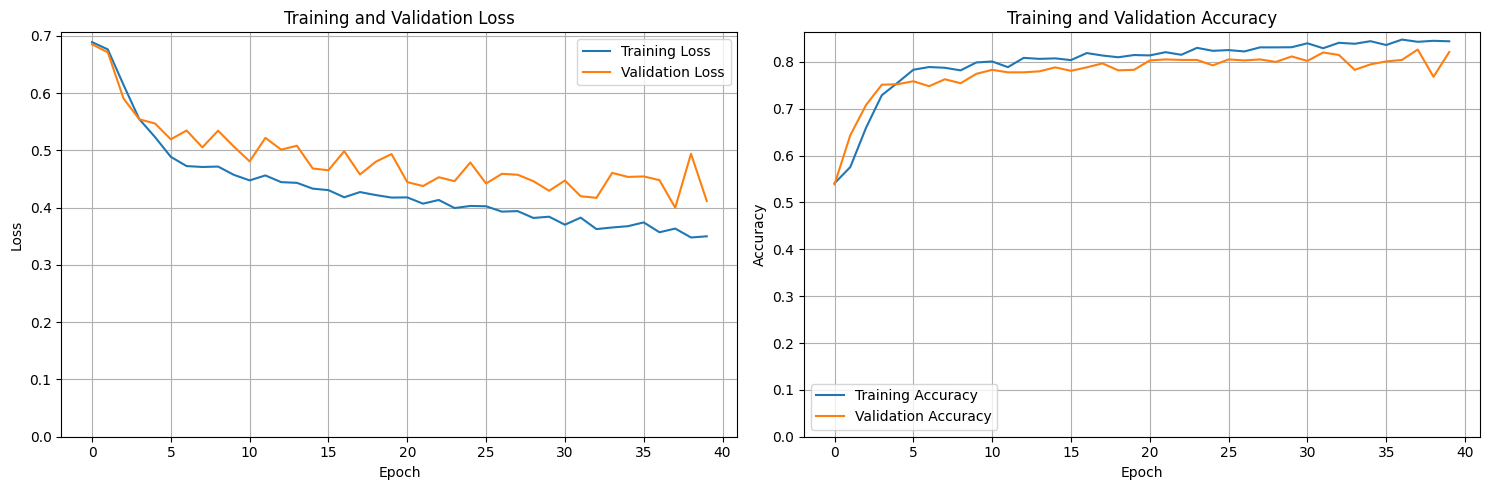

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_7.history['loss']
val_loss = mod_two_7.history['val_loss']
accuracy = mod_two_7.history['accuracy']
val_accuracy = mod_two_7.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Optimizing the kernel size

In [ ]:
#defining model
def My_Second_Cnn_8(param):
  model_2_8=Sequential()

  #adding convolution layer
  model_2_8.add(Conv2D(96,kernel_size=param.Choice('conv_1_kernel', values = [3,5,11]),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_8.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_8.add(Dropout(0.2))


  ###Second Convolutional Layer
  model_2_8.add(Conv2D(80,kernel_size=param.Choice('conv_2_kernel', values = [3,5,11]),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_8.add(Dropout(0.2))

  ###Third Convolutional Layer
  model_2_8.add(Conv2D(96,kernel_size=param.Choice('conv_3_kernel', values = [3,5,11]),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_8.add(Dropout(0.15))

  #adding fully connected layer
  model_2_8.add(Flatten())
  model_2_8.add(Dense(128,activation='relu'))
  model_2_8.add(Dropout(0.2))

  #adding output layer
  model_2_8.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_8.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.00005),metrics=['accuracy'])

  return model_2_8

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_8,
  objective='val_accuracy',
  max_trials=5,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 5
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=5)

Trial 5 Complete [00h 34m 05s]
val_accuracy: 0.7746031880378723

Best val_accuracy So Far: 0.7809523940086365
Total elapsed time: 05h 40m 34s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv_1_kernel': 5, 'conv_2_kernel': 11, 'conv_3_kernel': 3}

In [ ]:
model_best_2_8= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_8=model_best_2_8.fit(train_generator_n,validation_data = valid_generator_n, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/40
119/119 [==============================] - 1468s 12s/step - loss: 0.6825 - accuracy: 0.5626 - val_loss: 0.6514 - val_accuracy: 0.6825
Epoch 2/40
119/119 [==============================] - 1421s 12s/step - loss: 0.5819 - accuracy: 0.6901 - val_loss: 0.5399 - val_accuracy: 0.7619
Epoch 3/40
 28/119 [======>.......................] - ETA: 16:27 - loss: 0.5532 - accuracy: 0.7112

In [ ]:
test_loss,test_acc=model_best_2_8.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_8.history['loss']
val_loss = mm_40_8.history['val_loss']
accuracy = mm_40_8.history['accuracy']
val_accuracy = mm_40_8.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Inserting the kernels into the architecture

In [ ]:
#defining model
def My_Second_Cnn_8():
  model_2_8=Sequential()

  #adding convolution layer
  model_2_8.add(Conv2D(96,kernel_size=(5,5),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_8.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_8.add(Dropout(0.2))


  ###Second Convolutional Layer
  model_2_8.add(Conv2D(80,kernel_size=(11,11),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_8.add(Dropout(0.2))

  ###Third Convolutional Layer
  model_2_8.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_8.add(Dropout(0.15))

  #adding fully connected layer
  model_2_8.add(Flatten())
  model_2_8.add(Dense(128,activation='relu'))
  model_2_8.add(Dropout(0.2))

  #adding output layer
  model_2_8.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_8.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.00005),metrics=['accuracy'])

  return model_2_8

In [ ]:
My_model_sec_8=My_Second_Cnn_8()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mod_two_8=My_model_sec_8.fit(train_generator_n,validation_data = valid_generator_n,epochs=60,callbacks=[early_stop], verbose=1,batch_size=32)

Epoch 1/60
119/119 [==============================] - 15s 107ms/step - loss: 0.6880 - accuracy: 0.5441 - val_loss: 0.6898 - val_accuracy: 0.4783
Epoch 2/60
119/119 [==============================] - 13s 105ms/step - loss: 0.6203 - accuracy: 0.6711 - val_loss: 0.5689 - val_accuracy: 0.7228
Epoch 3/60
119/119 [==============================] - 14s 115ms/step - loss: 0.5309 - accuracy: 0.7445 - val_loss: 0.5592 - val_accuracy: 0.7164
Epoch 4/60
119/119 [==============================] - 13s 106ms/step - loss: 0.5243 - accuracy: 0.7511 - val_loss: 0.4968 - val_accuracy: 0.7683
Epoch 5/60
119/119 [==============================] - 13s 104ms/step - loss: 0.4931 - accuracy: 0.7790 - val_loss: 0.4820 - val_accuracy: 0.7693
Epoch 6/60
119/119 [==============================] - 13s 107ms/step - loss: 0.4712 - accuracy: 0.7917 - val_loss: 0.4712 - val_accuracy: 0.7915
Epoch 7/60
119/119 [==============================] - 13s 110ms/step - loss: 0.4657 - accuracy: 0.7862 - val_loss: 0.4833 - val_ac

In [ ]:
test_loss,test_acc=My_model_sec_8.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 1s 17ms/step - loss: 0.3334 - accuracy: 0.8471
Test accuracy: 0.8471283912658691
Test loss: 0.3334202170372009


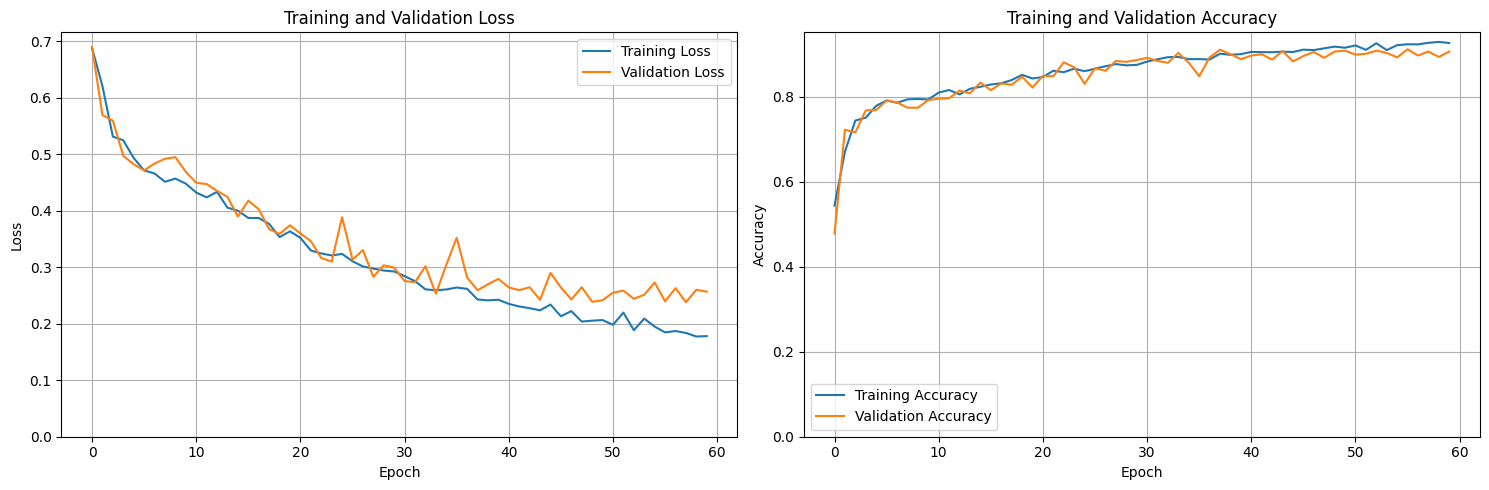

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_8.history['loss']
val_loss = mod_two_8.history['val_loss']
accuracy = mod_two_8.history['accuracy']
val_accuracy = mod_two_8.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

After tuning almost all the hyperparameters I finally obtain better result compared to the previous ones

Optimizing the pool

In [ ]:
#defining model
def My_Second_Cnn_9(param):
  model_2_9=Sequential()

  #adding convolution layer
  model_2_9.add(Conv2D(96,kernel_size=(5,5),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_2_9.add(MaxPool2D(pool_size=param.Choice('pool_1', values = [2,3,5]),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_9.add(Dropout(0.2))


  ###Second Convolutional Layer
  model_2_9.add(Conv2D(80,kernel_size=(11,11),activation='relu',padding='same'))
  model_2_9.add(MaxPool2D(pool_size=param.Choice('pool_2', values = [2,3,5]),padding='same'))
  model_2_9.add(Dropout(0.2))

  ###Third Convolutional Layer
  model_2_9.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_9.add(MaxPool2D(pool_size=param.Choice('pool_3', values = [2,3,5]), padding='same'))
  model_2_9.add(Dropout(0.15))

  #adding fully connected layer
  model_2_9.add(Flatten())
  model_2_9.add(Dense(128,activation='relu'))
  model_2_9.add(Dropout(0.2))

  #adding output layer
  model_2_9.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_9.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.00005),metrics=['accuracy'])

  return model_2_9

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_9,
  objective='val_accuracy',
  max_trials=10,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 5
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 10 Complete [00h 01m 45s]
val_accuracy: 0.7883597612380981

Best val_accuracy So Far: 0.811640202999115
Total elapsed time: 00h 18m 34s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'pool_1': 5, 'pool_2': 2, 'pool_3': 2}

In [ ]:
model_best_2_9= tuner_r.hypermodel.build(best_hps)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
file_name = 'my_model_2_9'

In [ ]:
tensorboard = TensorBoard(log_dir="logs\\{}".format(file_name))

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mod_two_9= model_best_2_9.fit(train_generator_n,validation_data = valid_generator_n,epochs=60,callbacks=[early_stop,tensorboard], verbose=1,batch_size=32)

Epoch 1/60
119/119 [==============================] - 13s 97ms/step - loss: 0.6743 - accuracy: 0.5742 - val_loss: 0.5986 - val_accuracy: 0.6783
Epoch 2/60
119/119 [==============================] - 12s 98ms/step - loss: 0.5509 - accuracy: 0.7231 - val_loss: 0.5363 - val_accuracy: 0.7206
Epoch 3/60
119/119 [==============================] - 11s 95ms/step - loss: 0.5265 - accuracy: 0.7511 - val_loss: 0.5464 - val_accuracy: 0.7376
Epoch 4/60
119/119 [==============================] - 12s 99ms/step - loss: 0.4792 - accuracy: 0.7819 - val_loss: 0.4866 - val_accuracy: 0.7810
Epoch 5/60
119/119 [==============================] - 12s 105ms/step - loss: 0.4768 - accuracy: 0.7790 - val_loss: 0.4876 - val_accuracy: 0.7767
Epoch 6/60
119/119 [==============================] - 12s 98ms/step - loss: 0.4588 - accuracy: 0.7901 - val_loss: 0.5322 - val_accuracy: 0.7471
Epoch 7/60
119/119 [==============================] - 11s 94ms/step - loss: 0.4427 - accuracy: 0.7996 - val_loss: 0.4489 - val_accuracy

In [ ]:
test_loss,test_acc=model_best_2_9.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 1s 17ms/step - loss: 0.3106 - accuracy: 0.8725
Test accuracy: 0.8724662065505981
Test loss: 0.31060516834259033


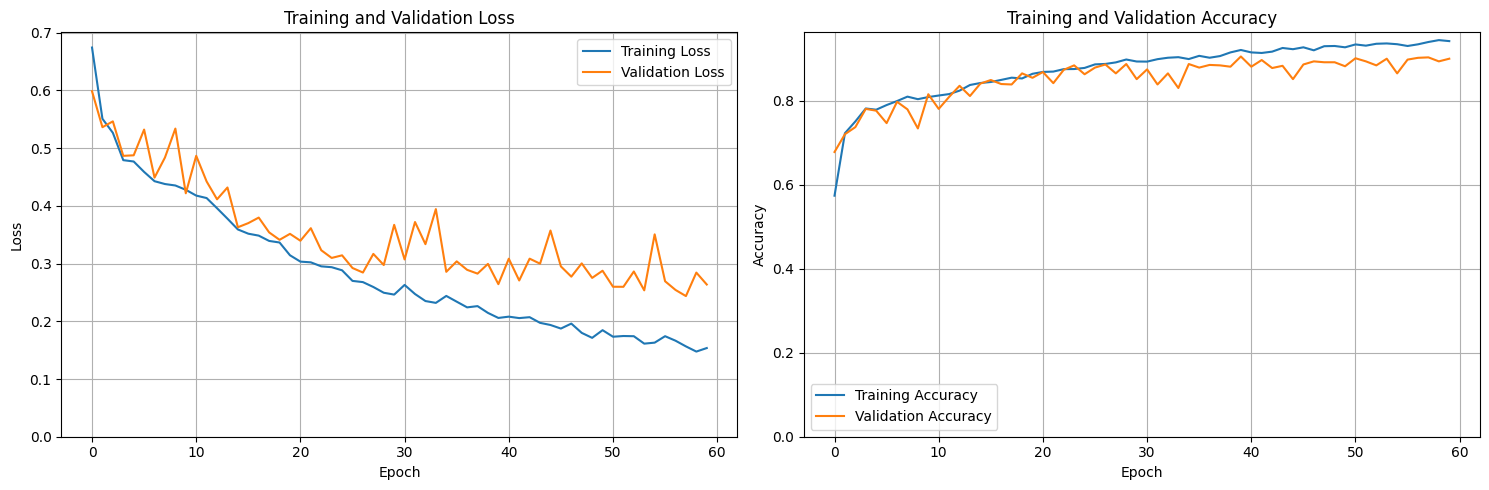

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_9.history['loss']
val_loss = mod_two_9.history['val_loss']
accuracy = mod_two_9.history['accuracy']
val_accuracy = mod_two_9.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
test_generat_n.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

37/37 [==============================] - 1s 22ms/step


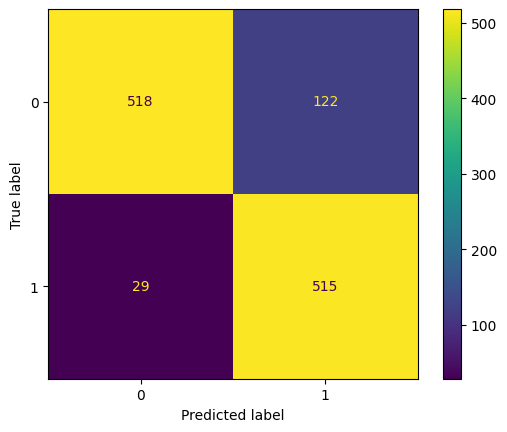

In [ ]:
test_predic = model_best_2_9.predict(test_generat_n)
test_predic = [0 if val < 0.5 else 1 for val in test_predic]

test_true_labels = test_generat_n.classes

cm = confusion_matrix(test_true_labels, test_predic)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

**Third model with one added convolution layer**

In [ ]:
#defining model
def My_Third_Cnn():
  model_3=Sequential()

  #adding convolution layer
  model_3.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_3.add(MaxPool2D(pool_size=(2,2)))
  #Dropoutlayer
  model_3.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_3.add(MaxPool2D(pool_size=(2,2)))
  model_3.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_3.add(MaxPool2D(pool_size=(2,2)))
  model_3.add(Dropout(0.05))

  ###Fourth Convolutional Layer
  model_3.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
  model_3.add(MaxPool2D(pool_size=(2,2)))
  model_3.add(Dropout(0.05))

  #adding fully connected layer
  model_3.add(Flatten())
  model_3.add(Dense(128,activation='relu'))
  model_3.add(Dropout(0.05))

  #adding output layer
  model_3.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_3

In [ ]:
Third_model=My_Third_Cnn()

In [ ]:
mod_three=Third_model.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 58s 475ms/step - loss: 0.6752 - accuracy: 0.5771 - val_loss: 0.6219 - val_accuracy: 0.7090
Epoch 2/40
119/119 [==============================] - 57s 475ms/step - loss: 0.5340 - accuracy: 0.7463 - val_loss: 0.5269 - val_accuracy: 0.7460
Epoch 3/40
119/119 [==============================] - 57s 477ms/step - loss: 0.4898 - accuracy: 0.7724 - val_loss: 0.4789 - val_accuracy: 0.7672
Epoch 4/40
119/119 [==============================] - 56s 470ms/step - loss: 0.4647 - accuracy: 0.7854 - val_loss: 0.4253 - val_accuracy: 0.8063
Epoch 5/40
119/119 [==============================] - 55s 465ms/step - loss: 0.4191 - accuracy: 0.8157 - val_loss: 0.4614 - val_accuracy: 0.7640
Epoch 6/40
119/119 [==============================] - 57s 481ms/step - loss: 0.3864 - accuracy: 0.8273 - val_loss: 0.3818 - val_accuracy: 0.8233
Epoch 7/40
119/119 [==============================] - 54s 452ms/step - loss: 0.3753 - accuracy: 0.8358 - val_loss: 0.4787 - val_ac

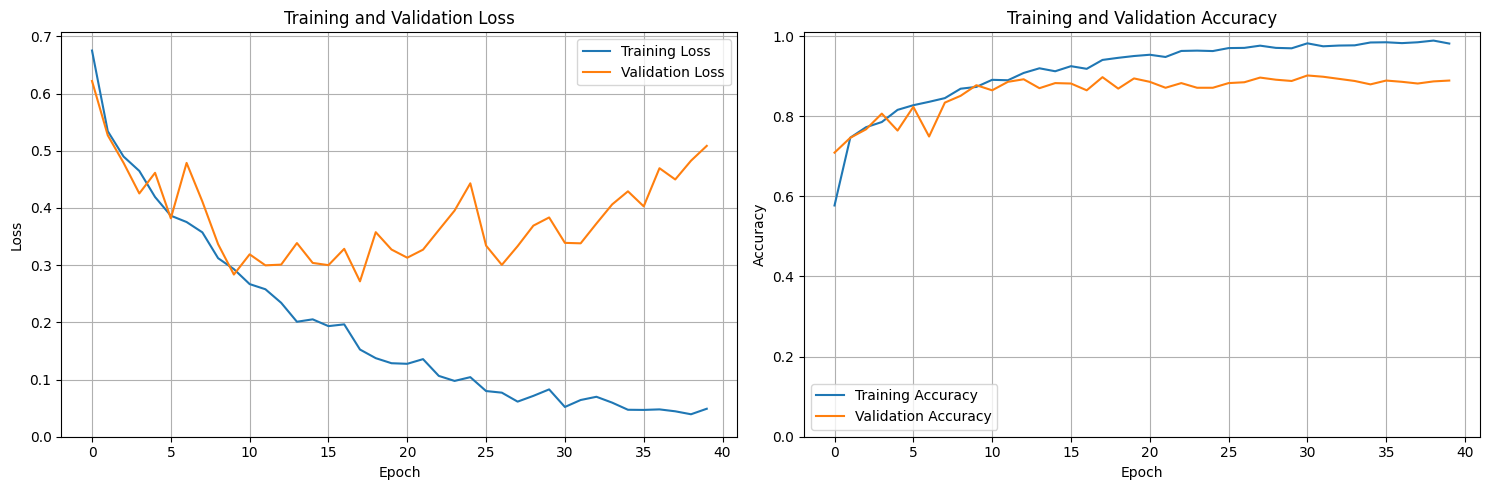

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_three.history['loss']
val_loss = mod_three.history['val_loss']
accuracy = mod_three.history['accuracy']
val_accuracy = mod_three.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Third_model.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 4s 111ms/step - loss: 0.5698 - accuracy: 0.8818
Test accuracy: 0.8817567825317383
Test loss: 0.5697519779205322


Third model with hyperparameter tuning

In [ ]:
#defining model
def My_Third_Cnn_3_1(param):
  model_3_1=Sequential()

  #adding convolution layer
  model_3_1.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_3_1.add(MaxPool2D(pool_size=(2,2)))
  #Dropoutlayer
  model_3_1.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.5, step=0.05)))


  ###Second Convolutional Layer
  model_3_1.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_3_1.add(MaxPool2D(pool_size=(2,2)))
  model_3_1.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.5, step=0.05)))

  ###Third Convolutional Layer
  model_3_1.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_3_1.add(MaxPool2D(pool_size=(2,2)))
  model_3_1.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.5, step=0.05)))

  ###Fourth Convolutional Layer
  model_3_1.add(Conv2D(filters=param.Int('conv4_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_3_1.add(MaxPool2D(pool_size=(2,2)))
  model_3_1.add(Dropout(param.Float('drop_4', min_value=0.0, max_value=0.5, step=0.05)))

  #adding fully connected layer
  model_3_1.add(Flatten())
  model_3_1.add(Dense(units=param.Int('units', min_value=32, max_value=256, step=16),activation='relu'))
  model_3_1.add(Dropout(param.Float('drop_5', min_value=0.0, max_value=0.5, step=0.05)))

  #adding output layer
  model_3_1.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_3_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_3_1

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Third_Cnn_3_1,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 10 Complete [00h 03m 23s]
val_accuracy: 0.6165784796079

Best val_accuracy So Far: 0.8451499144236246
Total elapsed time: 00h 40m 44s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 128,
 'drop_1': 0.35000000000000003,
 'conv2_filter': 96,
 'drop_2': 0.15000000000000002,
 'conv3_filter': 64,
 'drop_3': 0.30000000000000004,
 'conv4_filter': 240,
 'drop_4': 0.15000000000000002,
 'units': 240,
 'drop_5': 0.25}

In [ ]:
model_best_3_1= tuner_r.hypermodel.build(best_hps)

In [ ]:
model_best_3_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 128)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 49, 49, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 96)        110688    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 96)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 96)       

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,start_from_epoch=20)
mm_50=model_best_3_1.fit(train_generator_n,validation_data = valid_generator_n, epochs=50,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/50
119/119 [==============================] - 10s 63ms/step - loss: 0.6935 - accuracy: 0.5327 - val_loss: 0.6903 - val_accuracy: 0.5249
Epoch 2/50
119/119 [==============================] - 8s 70ms/step - loss: 0.6535 - accuracy: 0.6088 - val_loss: 0.6795 - val_accuracy: 0.5915
Epoch 3/50
119/119 [==============================] - 8s 70ms/step - loss: 0.5857 - accuracy: 0.7062 - val_loss: 0.5627 - val_accuracy: 0.7460
Epoch 4/50
119/119 [==============================] - 7s 61ms/step - loss: 0.5227 - accuracy: 0.7611 - val_loss: 0.5668 - val_accuracy: 0.7354
Epoch 5/50
119/119 [==============================] - 8s 67ms/step - loss: 0.4941 - accuracy: 0.7761 - val_loss: 0.4834 - val_accuracy: 0.7947
Epoch 6/50
119/119 [==============================] - 8s 70ms/step - loss: 0.4754 - accuracy: 0.7841 - val_loss: 0.4251 - val_accuracy: 0.8148
Epoch 7/50
119/119 [==============================] - 7s 61ms/step - loss: 0.4629 - accuracy: 0.7936 - val_loss: 0.4122 - val_accuracy: 0.815

In [ ]:
test_loss,test_acc=model_best_3_1.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 1s 16ms/step - loss: 0.3244 - accuracy: 0.8623
Test accuracy: 0.8623310923576355
Test loss: 0.32442206144332886


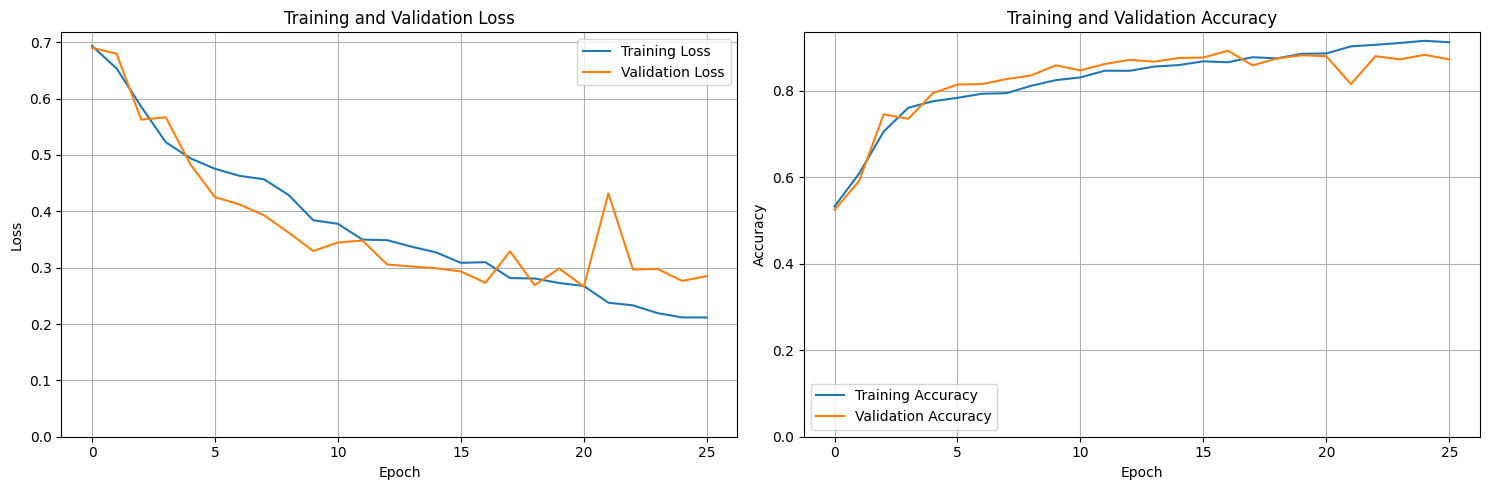

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_50.history['loss']
val_loss = mm_50.history['val_loss']
accuracy = mm_50.history['accuracy']
val_accuracy = mm_50.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Kernel tuning and learning rate tuning

In [ ]:
#defining model
def My_Third_Cnn_3_2(param):
  model_3_2=Sequential()

  #adding convolution layer
  model_3_2.add(Conv2D(128,kernel_size=param.Choice('conv_1_kernel', values = [3,5,11,16]),activation='relu',input_shape=(100,100,1), padding='same'))
  #adding pooling layer
  model_3_2.add(MaxPool2D(pool_size=(2,2), padding='same'))
  #Dropoutlayer
  model_3_2.add(Dropout(0.35))


  ###Second Convolutional Layer
  model_3_2.add(Conv2D(96,kernel_size=param.Choice('conv_2_kernel', values = [3,5,11,16]),activation='relu', padding='same'))
  model_3_2.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_3_2.add(Dropout(0.15))

  ###Third Convolutional Layer
  model_3_2.add(Conv2D(64,kernel_size=param.Choice('conv_3_kernel', values = [3,5,11,16]),activation='relu', padding='same'))
  model_3_2.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_3_2.add(Dropout(0.3))

  ###Fourth Convolutional Layer
  model_3_2.add(Conv2D(240,kernel_size=param.Choice('conv_4_kernel', values = [3,5,11,16]),activation='relu', padding='same'))
  model_3_2.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_3_2.add(Dropout(0.15))

  #adding fully connected layer
  model_3_2.add(Flatten())
  model_3_2.add(Dense(240,activation='relu'))
  model_3_2.add(Dropout(0.25))

  #adding output layer
  model_3_2.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_3_2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= param.Float('learning_rate',min_value=1e-6, max_value=1e-2, sampling='log')),metrics=['accuracy'])

  return model_3_2

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Third_Cnn_3_2,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 10 Complete [00h 03m 36s]
val_accuracy: 0.5407407283782959

Best val_accuracy So Far: 0.8345679044723511
Total elapsed time: 00h 47m 36s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv_1_kernel': 5,
 'conv_2_kernel': 11,
 'conv_3_kernel': 3,
 'conv_4_kernel': 11,
 'learning_rate': 0.0002959122840562636}

In [ ]:
model_best_3_2= tuner_r.hypermodel.build(best_hps)

In [ ]:
model_best_3_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 128)     3328      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 50, 50, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 96)        1486944   
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 96)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 25, 96)       

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,start_from_epoch=20)
mm_50=model_best_3_2.fit(train_generator_n,validation_data = valid_generator_n, epochs=50,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/50
119/119 [==============================] - 11s 72ms/step - loss: 0.6936 - accuracy: 0.5343 - val_loss: 0.6764 - val_accuracy: 0.6212
Epoch 2/50
119/119 [==============================] - 9s 72ms/step - loss: 0.6324 - accuracy: 0.6365 - val_loss: 0.6126 - val_accuracy: 0.6148
Epoch 3/50
119/119 [==============================] - 9s 77ms/step - loss: 0.5504 - accuracy: 0.7289 - val_loss: 0.5154 - val_accuracy: 0.7714
Epoch 4/50
119/119 [==============================] - 10s 80ms/step - loss: 0.5156 - accuracy: 0.7579 - val_loss: 0.5022 - val_accuracy: 0.7968
Epoch 5/50
119/119 [==============================] - 8s 68ms/step - loss: 0.4878 - accuracy: 0.7746 - val_loss: 0.4362 - val_accuracy: 0.8116
Epoch 6/50
119/119 [==============================] - 9s 76ms/step - loss: 0.4792 - accuracy: 0.7790 - val_loss: 0.4617 - val_accuracy: 0.7905
Epoch 7/50
119/119 [==============================] - 9s 75ms/step - loss: 0.4579 - accuracy: 0.7920 - val_loss: 0.4167 - val_accuracy: 0.82

In [ ]:
test_loss,test_acc=model_best_3_2.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 1s 17ms/step - loss: 0.4389 - accuracy: 0.8590
Test accuracy: 0.8589527010917664
Test loss: 0.4389008581638336


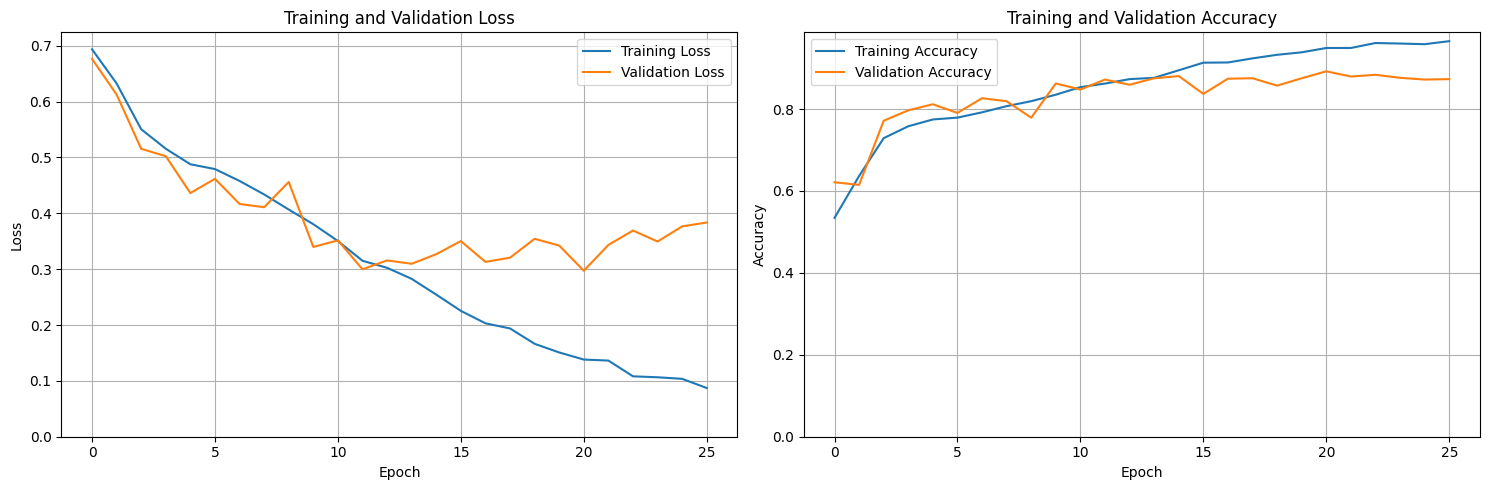

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_50.history['loss']
val_loss = mm_50.history['val_loss']
accuracy = mm_50.history['accuracy']
val_accuracy = mm_50.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

**Fourth Model**:
Deeper model with respect to the previous models

In [ ]:
#defining model
def My_Fourth_Cnn():
  model_4=Sequential()

  #adding convolution layer
  model_4.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_4.add(MaxPool2D(pool_size=(2,2)))
  #Dropoutlayer
  model_4.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_4.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_4.add(MaxPool2D(pool_size=(2,2)))
  model_4.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_4.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_4.add(MaxPool2D(pool_size=(2,2)))
  model_4.add(Dropout(0.05))

  ###Fourth Convolutional Layer
  model_4.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
  model_4.add(MaxPool2D(pool_size=(2,2)))
  model_4.add(Dropout(0.05))

  #adding fully connected layer
  model_4.add(Flatten())
  model_4.add(Dense(256,activation='relu'))
  model_4.add(Dropout(0.05))

  #adding output layer
  model_4.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_4

In [ ]:
Fourth_model=My_Fourth_Cnn()

In [ ]:
mod_four=Fourth_model.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 214s 2s/step - loss: 0.6887 - accuracy: 0.5467 - val_loss: 0.6883 - val_accuracy: 0.5365
Epoch 2/40
119/119 [==============================] - 198s 2s/step - loss: 0.6096 - accuracy: 0.6800 - val_loss: 0.8020 - val_accuracy: 0.6730
Epoch 3/40
119/119 [==============================] - 205s 2s/step - loss: 0.5425 - accuracy: 0.7423 - val_loss: 0.5082 - val_accuracy: 0.7672
Epoch 4/40
119/119 [==============================] - 198s 2s/step - loss: 0.4912 - accuracy: 0.7695 - val_loss: 0.4760 - val_accuracy: 0.7746
Epoch 5/40
119/119 [==============================] - 196s 2s/step - loss: 0.4634 - accuracy: 0.7912 - val_loss: 0.4124 - val_accuracy: 0.8138
Epoch 6/40
119/119 [==============================] - 197s 2s/step - loss: 0.4163 - accuracy: 0.8157 - val_loss: 0.4401 - val_accuracy: 0.7915
Epoch 7/40
119/119 [==============================] - 205s 2s/step - loss: 0.3863 - accuracy: 0.8266 - val_loss: 0.3948 - val_accuracy: 0.8138

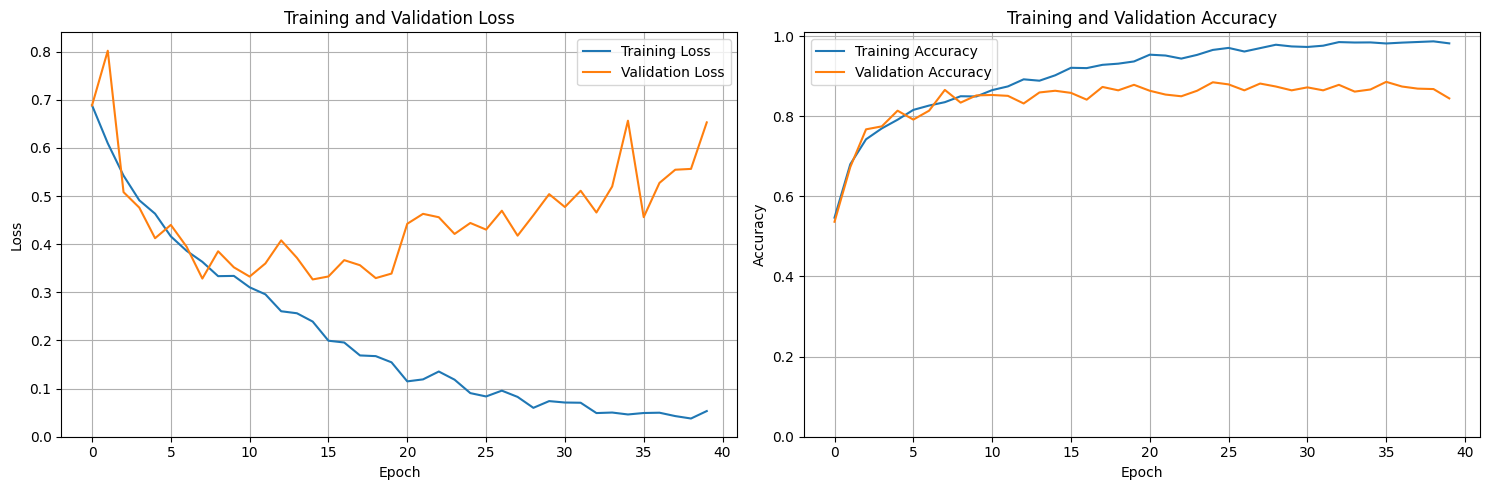

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_four.history['loss']
val_loss = mod_four.history['val_loss']
accuracy = mod_four.history['accuracy']
val_accuracy = mod_four.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Fourth_model.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 16s 420ms/step - loss: 0.4903 - accuracy: 0.8826
Test accuracy: 0.8826013803482056
Test loss: 0.49025365710258484


In [ ]:
#defining model with hyperparam tuning
def My_Fourth_Cnn(param):
  model_4=Sequential()

  #adding convolution layer
  model_4.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(100,100,1),padding="same"))
  #adding pooling layer
  model_4.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))
  #Dropoutlayer
  model_4.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))


  ###Second Convolutional Layer
  model_4.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',padding="same"))
  model_4.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_4.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.3, step=0.05)))

  ###Third Convolutional Layer
  model_4.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',padding="same"))
  model_4.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_4.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  ###Fourth Convolutional Layer
  model_4.add(Conv2D(filters=param.Int('conv4_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_4.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_4.add(Dropout(param.Float('drop_4', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model_4.add(Flatten())
  model_4.add(Dense(units=param.Int('units', min_value=32, max_value=128, step=16),activation='relu'))
  model_4.add(Dropout(param.Float('drop_c', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model_4.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_4

In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Fourth_Cnn,
  objective='val_accuracy',
  max_trials=5,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

In [ ]:
model_best.summary()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_50=model_best.fit(train_generator_n,validation_data = valid_generator_n, epochs=50,callbacks=[early_stop], verbose=1, batch_size=32)

With hyperparameter tuning already run previously Best so far.


In [ ]:
#defining model
def My_Fourth_Cnn_1():
  model_4_1=Sequential()

  #adding convolution layer
  model_4_1.add(Conv2D(48,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_4_1.add(MaxPool2D(pool_size=(2,2)))


  ###Second Convolutional Layer
  model_4_1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model_4_1.add(MaxPool2D(pool_size=(2,2)))
  model_4_1.add(Dropout(0.1))

  ###Third Convolutional Layer
  model_4_1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_4_1.add(MaxPool2D(pool_size=(2,2)))

  ###Fourth Convolutional Layer
  model_4_1.add(Conv2D(176,kernel_size=(3,3),activation='relu'))
  model_4_1.add(MaxPool2D(pool_size=(2,2)))
  model_4_1.add(Dropout(0.05))

  #adding fully connected layer
  model_4_1.add(Flatten())
  model_4_1.add(Dense(80,activation='relu'))
  model_4_1.add(Dropout(0.15))

  #adding output layer
  model_4_1.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_4_1

In [ ]:
Fourth_model_1=My_Fourth_Cnn_1()

In [ ]:
mod_four_1=Fourth_model_1.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 52s 427ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.6897 - val_accuracy: 0.5407
Epoch 2/40
119/119 [==============================] - 45s 376ms/step - loss: 0.6908 - accuracy: 0.5407 - val_loss: 0.6900 - val_accuracy: 0.5407
Epoch 3/40
119/119 [==============================] - 44s 368ms/step - loss: 0.6745 - accuracy: 0.5842 - val_loss: 0.5947 - val_accuracy: 0.7005
Epoch 4/40
119/119 [==============================] - 44s 368ms/step - loss: 0.5708 - accuracy: 0.6946 - val_loss: 0.5654 - val_accuracy: 0.7058
Epoch 5/40
119/119 [==============================] - 44s 374ms/step - loss: 0.5025 - accuracy: 0.7600 - val_loss: 0.5626 - val_accuracy: 0.7471
Epoch 6/40
119/119 [==============================] - 43s 361ms/step - loss: 0.4799 - accuracy: 0.7785 - val_loss: 0.5860 - val_accuracy: 0.7259
Epoch 7/40
119/119 [==============================] - 46s 384ms/step - loss: 0.4554 - accuracy: 0.7965 - val_loss: 0.4518 - val_ac

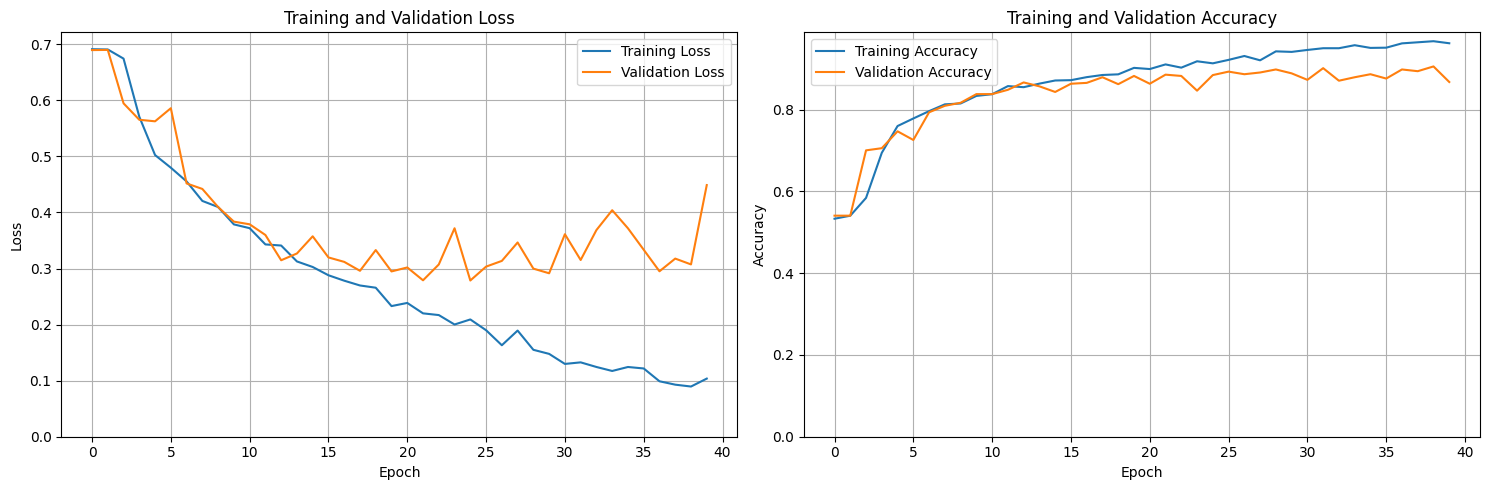

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_four_1.history['loss']
val_loss = mod_four_1.history['val_loss']
accuracy = mod_four_1.history['accuracy']
val_accuracy = mod_four_1.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Fourth_model_1.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 5s 125ms/step - loss: 0.4916 - accuracy: 0.8674
Test accuracy: 0.8673986196517944
Test loss: 0.49163344502449036


Fourth CNN with batchnormalization

In [ ]:
#defining model
def My_Fourth_Cnn_2():
  model_4_2=Sequential()

  #adding convolution layer
  model_4_2.add(Conv2D(48,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_4_2.add(MaxPool2D(pool_size=(2,2)))


  ###Second Convolutional Layer
  model_4_2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model_4_2.add(BatchNormalization())
  model_4_2.add(MaxPool2D(pool_size=(2,2)))
  model_4_2.add(Dropout(0.1))


  ###Third Convolutional Layer
  model_4_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_4_2.add(MaxPool2D(pool_size=(2,2)))

  ###Fourth Convolutional Layer
  model_4_2.add(Conv2D(176,kernel_size=(3,3),activation='relu'))
  model_4_2.add(MaxPool2D(pool_size=(2,2)))
  model_4_2.add(Dropout(0.05))

  #adding fully connected layer
  model_4_2.add(Flatten())
  model_4_2.add(Dense(80,activation='relu'))
  model_4_2.add(Dropout(0.15))

  #adding output layer
  model_4_2.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_4_2

In [ ]:
Fourth_model_2=My_Fourth_Cnn_2()

In [ ]:
mod_four_2=Fourth_model_2.fit(train_generator_n,validation_data = valid_generator_n,epochs=40,batch_size=32)

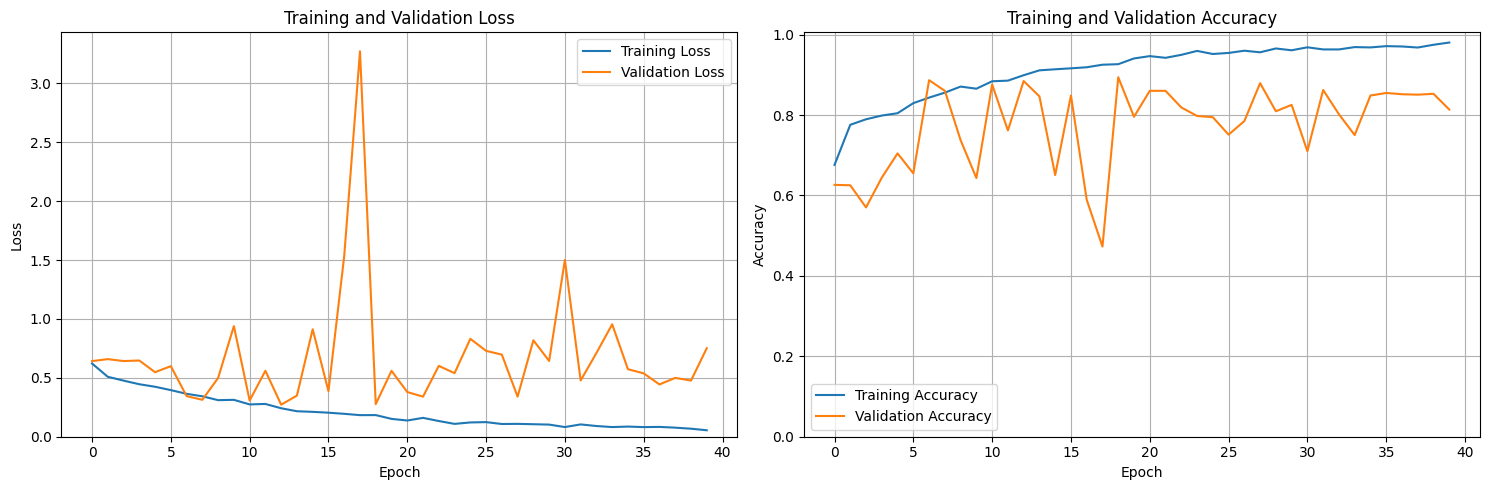

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_four_2.history['loss']
val_loss = mod_four_2.history['val_loss']
accuracy = mod_four_2.history['accuracy']
val_accuracy = mod_four_2.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Fourth_model_2.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 4s 109ms/step - loss: 0.4681 - accuracy: 0.8716
Test accuracy: 0.8716216087341309
Test loss: 0.46811655163764954


Modifying the best model so far Model 4_1
Model 4_2

Fourth_model with kernel tuning and learning rate tuning

In [ ]:
#defining model
def My_Fourth_Cnn_3(param):
  model_4_3=Sequential()

  #adding convolution layer
  model_4_3.add(Conv2D(48,kernel_size=param.Choice('conv_1_kernel', values = [3,5,11]),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))


  ###Second Convolutional Layer
  model_4_3.add(Conv2D(32,kernel_size=param.Choice('conv_2_kernel', values = [3,5,11]),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_4_3.add(Dropout(0.1))

  ###Third Convolutional Layer
  model_4_3.add(Conv2D(128,kernel_size=param.Choice('conv_3_kernel', values = [3,5,11]),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))

  ###Fourth Convolutional Layer
  model_4_3.add(Conv2D(176,kernel_size=param.Choice('conv_4_kernel', values = [3,5,11]),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_4_3.add(Dropout(0.05))

  #adding fully connected layer
  model_4_3.add(Flatten())
  model_4_3.add(Dense(80,activation='relu'))
  model_4_3.add(Dropout(0.15))

  #adding output layer
  model_4_3.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4_3.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= param.Float('learning_rate',min_value=1e-6, max_value=1e-2, sampling='log')),metrics=['accuracy'])

  return model_4_3

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Fourth_Cnn_3,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator_n,validation_data = valid_generator_n, epochs=8)

Trial 10 Complete [00h 03m 03s]
val_accuracy: 0.78024689356486

Best val_accuracy So Far: 0.78024689356486
Total elapsed time: 00h 26m 02s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv_1_kernel': 3,
 'conv_2_kernel': 3,
 'conv_3_kernel': 3,
 'conv_4_kernel': 3,
 'learning_rate': 5.933907622594074e-05}

In [ ]:
model_best_4_3= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_4_3=model_best_4_3.fit(train_generator_n,validation_data = valid_generator_n, epochs=80,callbacks=[early_stop], verbose=1, batch_size=32)

Epoch 1/80
119/119 [==============================] - 8s 53ms/step - loss: 0.6895 - accuracy: 0.5370 - val_loss: 0.6843 - val_accuracy: 0.5407
Epoch 2/80
119/119 [==============================] - 7s 63ms/step - loss: 0.6683 - accuracy: 0.5890 - val_loss: 0.6217 - val_accuracy: 0.6772
Epoch 3/80
119/119 [==============================] - 6s 52ms/step - loss: 0.5731 - accuracy: 0.7136 - val_loss: 0.5301 - val_accuracy: 0.7556
Epoch 4/80
119/119 [==============================] - 8s 63ms/step - loss: 0.5205 - accuracy: 0.7548 - val_loss: 0.5220 - val_accuracy: 0.7503
Epoch 5/80
119/119 [==============================] - 6s 52ms/step - loss: 0.4913 - accuracy: 0.7743 - val_loss: 0.5530 - val_accuracy: 0.7397
Epoch 6/80
119/119 [==============================] - 6s 51ms/step - loss: 0.4758 - accuracy: 0.7912 - val_loss: 0.5179 - val_accuracy: 0.7386
Epoch 7/80
119/119 [==============================] - 6s 53ms/step - loss: 0.4778 - accuracy: 0.7843 - val_loss: 0.4991 - val_accuracy: 0.7683

In [ ]:
test_loss,test_acc=model_best_4_3.evaluate(test_generat_n)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 0s 13ms/step - loss: 0.4049 - accuracy: 0.8285
Test accuracy: 0.8285472989082336
Test loss: 0.4049161970615387


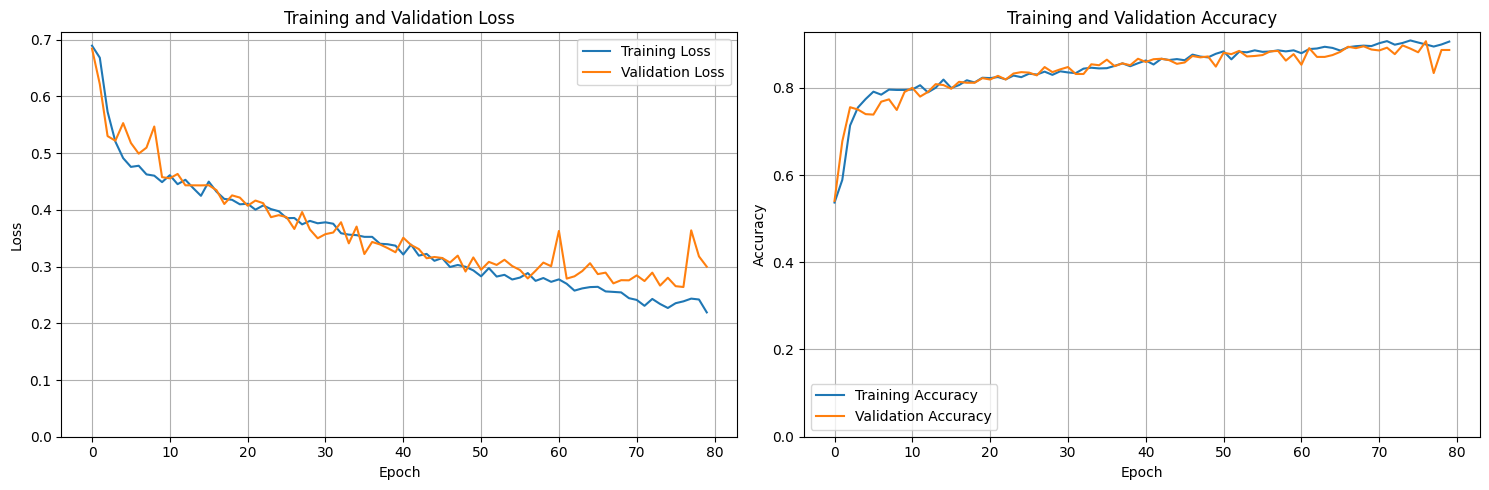

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_4_3.history['loss']
val_loss = mm_4_3.history['val_loss']
accuracy = mm_4_3.history['accuracy']
val_accuracy = mm_4_3.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Best result we obtained so far.

Model with the tuned parameter for KfoldCV

In [ ]:
#defining model
def My_Fourth_Cnn_3_():
  model_4_3=Sequential()

  #adding convolution layer
  model_4_3.add(Conv2D(48,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
  #adding pooling layer
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))


  ###Second Convolutional Layer
  model_4_3.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_4_3.add(Dropout(0.1))

  ###Third Convolutional Layer
  model_4_3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))

  ###Fourth Convolutional Layer
  model_4_3.add(Conv2D(176,kernel_size=(3,3),activation='relu'))
  model_4_3.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_4_3.add(Dropout(0.05))

  #adding fully connected layer
  model_4_3.add(Flatten())
  model_4_3.add(Dense(80,activation='relu'))
  model_4_3.add(Dropout(0.15))

  #adding output layer
  model_4_3.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_4_3.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.000059),metrics=['accuracy'])

  return model_4_3

Reoptimizing the kernel size without the first MaxPool2D layer

I added some other data augmentation features

In [ ]:
# Rescaling images
tv_datagenerat_n = ImageDataGenerator(
    rescale=1.0 / 255,# Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=False,
    validation_split=0.2
)
test_datagen_n=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator_n = tv_datagenerat_n.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=10,
    shuffle=True
)

Found 3788 images belonging to 2 classes.


In [ ]:
valid_generator_n= tv_datagenerat_n.flow_from_directory(
    directory=r'/content/train_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=10,
    shuffle=True
)

Found 945 images belonging to 2 classes.


In [ ]:
test_generat_n=test_datagen_n.flow_from_directory(
    directory=r'/content/test_grey',
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1184 images belonging to 2 classes.


K-Fold Cross Validation with the models that had the best results

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
!pip install --upgrade tensorflow scikit-learn
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation
from sklearn.model_selection import KFold
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


K-fold cross validation with the models that had the best results

In [ ]:
import os
import pandas as pd

# Set the paths to your data directories
Muffin_dir_tr = '/content/train_grey/muffin'
Chihuahua_dir_te = '/content/test_grey/chihuahua'

# Create DataFrames for each class
df_muffin = pd.DataFrame({"file_name": [os.path.join(Muffin_dir_tr, i) for i in os.listdir(Muffin_dir_tr)]})
df_muffin["label"] = "muffin"

# Add more data to muffin:
Muffin_dir_te = '/content/test_grey/muffin' # Replace with the path to your additional cat data
df_additional_muff = pd.DataFrame({"file_name": [os.path.join(Muffin_dir_te, i) for i in os.listdir(Muffin_dir_te)]})
df_additional_muff["label"] = "muffin"

# Create DataFrames for each class
df_chihuahua = pd.DataFrame({"file_name": [os.path.join(Chihuahua_dir_te, i) for i in os.listdir(Chihuahua_dir_te)]})
df_chihuahua["label"] = "chihuahua"

# Add more data to chihuahua
chihuahua_dir_tr = '/content/train_grey/chihuahua' # Replace with the path to your additional cat data
df_additional_chihuahua = pd.DataFrame({"file_name": [os.path.join(chihuahua_dir_tr, i) for i in os.listdir(chihuahua_dir_tr)]})
df_additional_chihuahua["label"] = "chihuahua"

# Concatenate chihiahua with the additional data
df_all = pd.concat([df_muffin, df_additional_muff,df_chihuahua,df_additional_chihuahua], ignore_index=True)


In [ ]:
df_all.head()

file_name   label
0   /content/train_grey/muffin/img_2_343.jpg  muffin
1   /content/train_grey/muffin/img_1_136.jpg  muffin
2   /content/train_grey/muffin/img_1_197.jpg  muffin
3  /content/train_grey/muffin/img_3_1087.jpg  muffin
4   /content/train_grey/muffin/img_3_131.jpg  muffin

In [ ]:
from tensorflow.keras.preprocessing import image

Second Attempt to K-fold Cross Validation with Imagedatagenerator

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save DataFrame to CSV
csv_path = '/content/df_all.csv'
df_all.to_csv(csv_path, index=False)

In [ ]:
dat = np.array(df_all['file_name'])
print(dat)

['/content/train_grey/muffin/img_2_343.jpg'
 '/content/train_grey/muffin/img_1_136.jpg'
 '/content/train_grey/muffin/img_1_197.jpg' ...
 '/content/train_grey/chihuahua/img_3_899.jpg'
 '/content/train_grey/chihuahua/img_0_769.jpg'
 '/content/train_grey/chihuahua/img_1_1120.jpg']


In [ ]:
shuffled = df_all.sample(frac=1,random_state=1)
shuffled.tail()

file_name      label
905      /content/train_grey/muffin/img_4_1093.jpg     muffin
5192   /content/train_grey/chihuahua/img_1_730.jpg  chihuahua
3980  /content/train_grey/chihuahua/img_3_1017.jpg  chihuahua
235       /content/train_grey/muffin/img_4_148.jpg     muffin
5157   /content/train_grey/chihuahua/img_2_821.jpg  chihuahua

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=333, shuffle=True)

acc_score = []
loss_score = []
classification_error= []

Data normalization and augmentation

In [ ]:
datagenA = ImageDataGenerator(rescale=1.0/255,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2)
datagenB= ImageDataGenerator( rescale= 1.0/255)

K-fold CV with the model My_Fourth_Cnn_3

In [ ]:
for train_index , test_index in kf.split(dat):
    X_train = dat[train_index]
    X_test = dat[test_index]

    train_cv = shuffled.loc[shuffled['file_name'].isin(X_train)]
    test_cv = shuffled.loc[shuffled['file_name'].isin(X_test)]

    training_ds= datagenA.flow_from_dataframe(dataframe= train_cv,
                                              directory="/content/df_all.csv",
                                              x_col ='file_name',
                                              y_col='label',
                                              target_size=(100,100),
                                              class_mode='binary',
                                              color_mode='grayscale',
                                              shuffle=True,
                                              seed=10)
    test_ds= datagenB.flow_from_dataframe(dataframe= test_cv,
                                                directory="/content/df_all.csv",
                                                x_col ='file_name',
                                                y_col='label',
                                                target_size=(100,100),
                                                class_mode='binary',
                                                color_mode='grayscale',
                                                shuffle=False,
                                                seed=10)

    model_4_3_cv = My_Fourth_Cnn_3_()
    model_4_3_cv.fit(training_ds, epochs = 60)

    #evaluating the results
    print("---------------------------------------------------------------------")
    print("Evaluation of the results....")
    results = model_4_3_cv.evaluate(test_ds)

    acc = results[1]
    acc_score.append(acc)

    # Calculate classification error (zero one loss)
    err = 1 - results[1]
    classification_error.append(err)

    loss = results[0]
    loss_score.append(loss)

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/60
148/148 [==============================] - 16s 63ms/step - loss: 0.6862 - accuracy: 0.5426
Epoch 2/60
148/148 [==============================] - 10s 70ms/step - loss: 0.6304 - accuracy: 0.6554
Epoch 3/60
148/148 [==============================] - 7s 44ms/step - loss: 0.5384 - accuracy: 0.7427
Epoch 4/60
148/148 [==============================] - 9s 60ms/step - loss: 0.4997 - accuracy: 0.7634
Epoch 5/60
148/148 [==============================] - 7s 48ms/step - loss: 0.4780 - accuracy: 0.7735
Epoch 6/60
148/148 [==============================] - 8s 56ms/step - loss: 0.4710 - accuracy: 0.7811
Epoch 7/60
148/148 [==============================] - 7s 48ms/step - loss: 0.4670 - accuracy: 0.7885
Epoch 8/60
148/148 [==============================] - 7s 45ms/step - loss: 0.4500 - accuracy: 0.7879
Epoch 9/60
148/148 [==============================] - 8s 53ms/step -

In [ ]:
avg_acc = np.mean(acc_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc))

accuracy of each fold - [0.8817567825317383, 0.869087815284729, 0.8571428656578064, 0.8402366638183594, 0.8765849471092224]
Avg accuracy : 0.864961814880371


In [ ]:
# Print the average loss
avg_loss = np.mean(loss)

print('Avg loss : {}'.format(avg_loss))

Avg loss : 0.28275659680366516


In [ ]:
# Print the average zero one loss over all folds
avg_z_loss = np.mean(classification_error)

print('zero one Loss in each fold - {}'.format(classification_error))
print('Avg zero-one loss : {}'.format(avg_z_loss))

zero one Loss in each fold - [0.11824321746826172, 0.130912184715271, 0.1428571343421936, 0.15976333618164062, 0.12341505289077759]
Avg zero-one loss : 0.1350381851196289


Plot of the accuracu and zero one loss in each fold

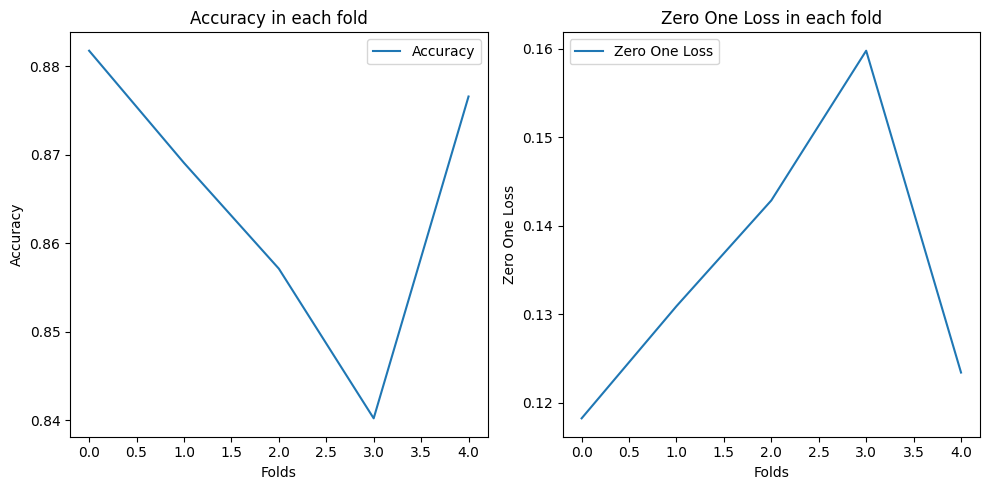

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_score, label='Accuracy')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')
plt.legend()

# Plotting the zero one loss
plt.subplot(1, 2, 2)
plt.plot(classification_error, label='Zero One Loss')
plt.xlabel('Folds')
plt.ylabel('Zero One Loss')
plt.title('Zero One Loss in each fold')
plt.legend()

plt.tight_layout()
plt.show()

K fold cross validation with My_model_sec_8


In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=333, shuffle=True)

acc_score_1 = []
loss_score_1 = []
classification_error_1= []

In [ ]:
for train_index , test_index in kf.split(dat):
    X_train = dat[train_index]
    X_test = dat[test_index]

    train_cv = shuffled.loc[shuffled['file_name'].isin(X_train)]
    test_cv = shuffled.loc[shuffled['file_name'].isin(X_test)]

    training_ds= datagenA.flow_from_dataframe(dataframe= train_cv,
                                              directory="/content/df_all.csv",
                                              x_col ='file_name',
                                              y_col='label',
                                              target_size=(100,100),
                                              class_mode='binary',
                                              color_mode='grayscale',
                                              shuffle=True,
                                              seed=10)

    test_ds= datagenB.flow_from_dataframe(dataframe= test_cv,
                                                directory="/content/df_all.csv",
                                                x_col ='file_name',
                                                y_col='label',
                                                target_size=(100,100),
                                                class_mode='binary',
                                                color_mode='grayscale',
                                                shuffle=False,
                                                seed=10)

    My_model_sec_8_cv=My_Second_Cnn_8()
    early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=40,restore_best_weights=True)
    My_model_sec_8_cv.fit(training_ds, epochs = 80,callbacks=[early_stop])
    results =  My_model_sec_8_cv.evaluate(test_ds)

    accuracy = results[1]
    acc_score_1.append(accuracy)

    # Calculate classification error (zero one loss)
    error = 1 - results[1]
    classification_error_1.append(error)

    loss = results[0]
    loss_score_1.append(loss)

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/80
148/148 [==============================] - 24s 108ms/step - loss: 0.6727 - accuracy: 0.5690
Epoch 2/80
148/148 [==============================] - 15s 102ms/step - loss: 0.5395 - accuracy: 0.7344
Epoch 3/80
148/148 [==============================] - 13s 91ms/step - loss: 0.4952 - accuracy: 0.7722
Epoch 4/80
148/148 [==============================] - 14s 92ms/step - loss: 0.4745 - accuracy: 0.7822
Epoch 5/80
148/148 [==============================] - 13s 90ms/step - loss: 0.4566 - accuracy: 0.7919
Epoch 6/80
148/148 [==============================] - 13s 89ms/step - loss: 0.4453 - accuracy: 0.7929
Epoch 7/80
148/148 [==============================] - 13s 90ms/step - loss: 0.4424 - accuracy: 0.8031
Epoch 8/80
148/148 [==============================] - 13s 89ms/step - loss: 0.4246 - accuracy: 0.8109
Epoch 9/80
148/148 [==============================] - 14s 92

In [ ]:
#Accuracy in each fold and average accuracy
avg_acc = np.mean(acc_score)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc))

accuracy of each fold - [0.8817567825317383, 0.869087815284729, 0.8571428656578064, 0.8402366638183594, 0.8765849471092224]
Avg accuracy : 0.864961814880371


In [ ]:
# Print the average accuracy  over all folds
avg_loss = np.mean(loss)

print('Loss in each fold - {}'.format(loss))
print('Avg loss : {}'.format(avg_loss))

Loss in each fold - 0.34202441573143005
Avg loss : 0.34202441573143005


In [ ]:
#Zero-one loss in each fold and average accuracy
avg_z_loss = np.mean(classification_error)

print('zero one Loss in each fold - {}'.format(classification_error))
print('Avg zero-one loss : {}'.format(avg_z_loss))

zero one Loss in each fold - [0.11824321746826172, 0.130912184715271, 0.1428571343421936, 0.15976333618164062, 0.12341505289077759]
Avg zero-one loss : 0.1350381851196289
